In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

## 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df_rose = pd.read_csv('Rose.csv')
df_rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [3]:
df_rose.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

##### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
df_rose['Time_Stamp'] = date

In [6]:
df_rose.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [7]:
df_rose.set_index(keys='Time_Stamp',drop=True,inplace=True)
df_rose.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [8]:
df_rose.drop(labels=['YearMonth'],axis=1,inplace=True)
df_rose.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [9]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [10]:
df_rose.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [11]:
df_rose.isnull().sum()

Rose    2
dtype: int64

Text(0, 0.5, 'Units Sold')

<Figure size 864x432 with 0 Axes>

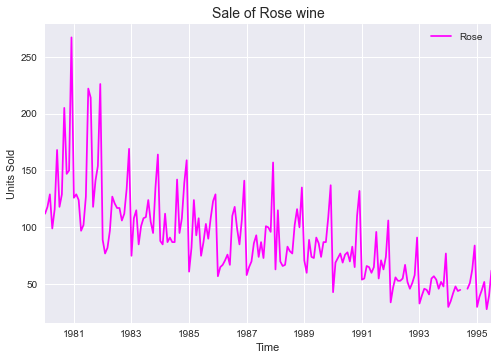

In [12]:
plt.figure(figsize = (12, 6))
df_rose.plot(color='magenta')
plt.title('Sale of Rose wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

In [13]:
df_rose['1994']

Rose
Time_Stamp      
1994-01-31  30.0
1994-02-28  35.0
1994-03-31  42.0
1994-04-30  48.0
1994-05-31  44.0
1994-06-30  45.0
1994-07-31   NaN
1994-08-31   NaN
1994-09-30  46.0
1994-10-31  51.0
1994-11-30  63.0
1994-12-31  84.0

Since the data has monthly frequency, we can resample at a shorter frequency such as day, Daily to get a better predicton. Some of the alias for time series frequency to be used in resample():

1.B: Business Day frequency
2.D: Calendar Day frequency
3.M: Month End frequency
4.MS: Month Start frequency
5.Q: Quarter End Frequency
6.QS: Quarter Start Frequency
7.H: Hourly Frequency
8.A: Year End frequency

In [14]:
df_rose.converted  = df_rose.Rose
ts = df_rose.converted.resample('D').mean() 
df_rose.Rose = ts.interpolate(method = 'linear')
df_rose.Rose['1994']

Time_Stamp
1994-01-31    30.000000
1994-02-28    35.000000
1994-03-31    42.000000
1994-04-30    48.000000
1994-05-31    44.000000
1994-06-30    45.000000
1994-07-31    45.336957
1994-08-31    45.673913
1994-09-30    46.000000
1994-10-31    51.000000
1994-11-30    63.000000
1994-12-31    84.000000
Name: Rose, dtype: float64

In [15]:
df_rose.describe()

Rose
count  187.000000
mean    89.914497
std     39.238259
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

##### Plot the Time Series to understand the behaviour of the data.

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] =  14,7

Text(0, 0.5, 'Units Sold')

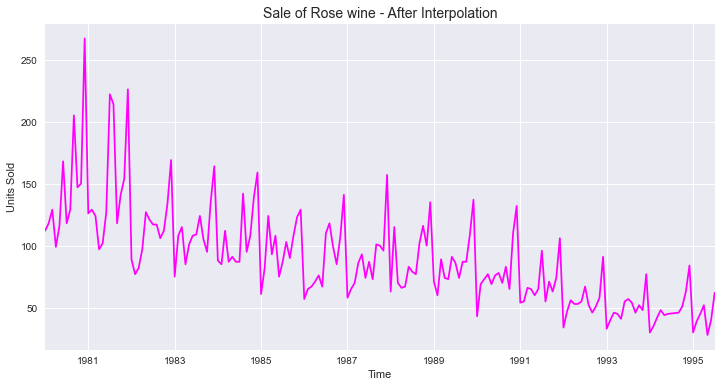

In [17]:
plt.figure(figsize = (12, 6))
df_rose.Rose.plot(color='magenta')
plt.title('Sale of Rose wine - After Interpolation', fontsize =14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF

Text(0, 0.5, 'Distribution')

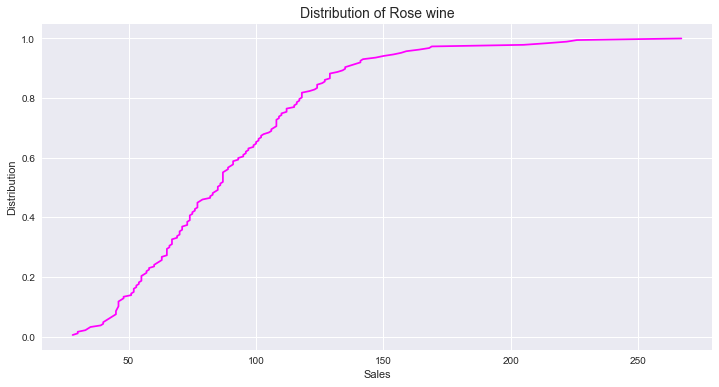

In [19]:
plt.figure(figsize = (12, 6))
cdf = ECDF(df_rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'magenta')
plt.title('Distribution of Rose wine', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Distribution')

##### Plot a boxplot to understand the spread of wine sales across different years and within different months across years.

###### Yearly Boxplot - Rose

Text(0.5, 1.0, 'Yearly Boxplot - Rose')

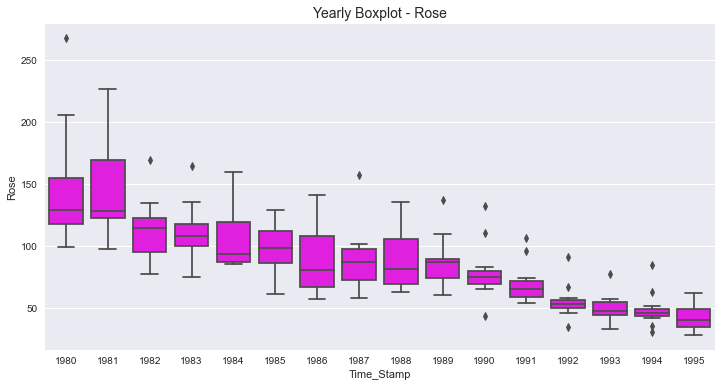

In [20]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df_rose.index.year,y = df_rose['Rose'], color='magenta')
plt.title('Yearly Boxplot - Rose', fontsize=14)

###### Monthly BoxPlot - Rose

Text(0.5, 1.0, 'Monthly Boxplot - Rose')

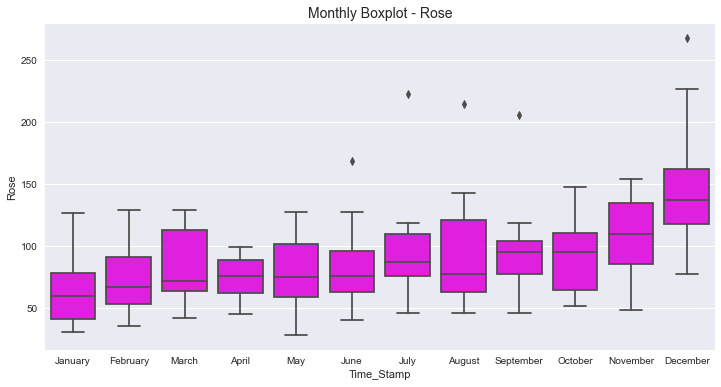

In [21]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df_rose.index.month_name(),y = df_rose['Rose'], color='magenta')
plt.title('Monthly Boxplot - Rose', fontsize=14)

#### Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

Text(0.5, 1.0, 'Rose - Monthly plot')

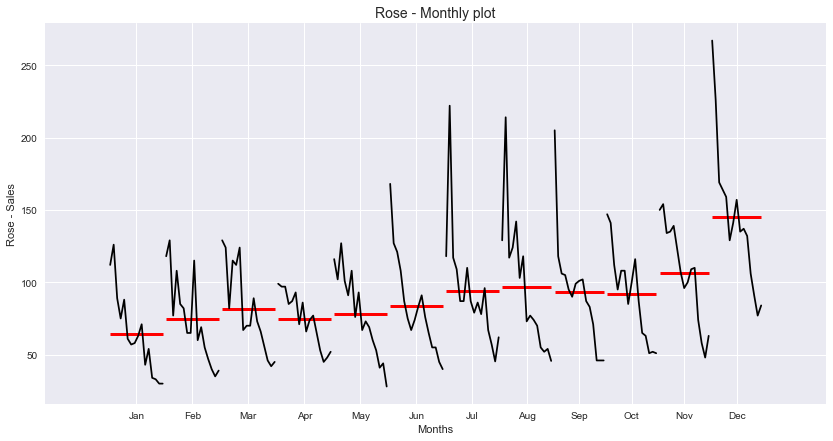

In [22]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df_rose['Rose'],ylabel='Rose - Sales')
plt.xlabel('Months')
plt.title('Rose - Monthly plot', fontsize=14)

This plot shows us the behaviour of the Time Series across various months. The red line is the median value.

#### Plot a graph of monthly sales across years.

In [23]:
monthly_sales_across_years = pd.pivot_table(df_rose, values = 'Rose', columns = df_rose.index.month, index = df_rose.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3     4      5      6           7           8   \
Time_Stamp                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   45.336957   45.673913   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Time_Stamp     9      10     11     12  
Time_Stamp                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

Text(0.5, 1.0, 'Rose - Monthly sales over years')

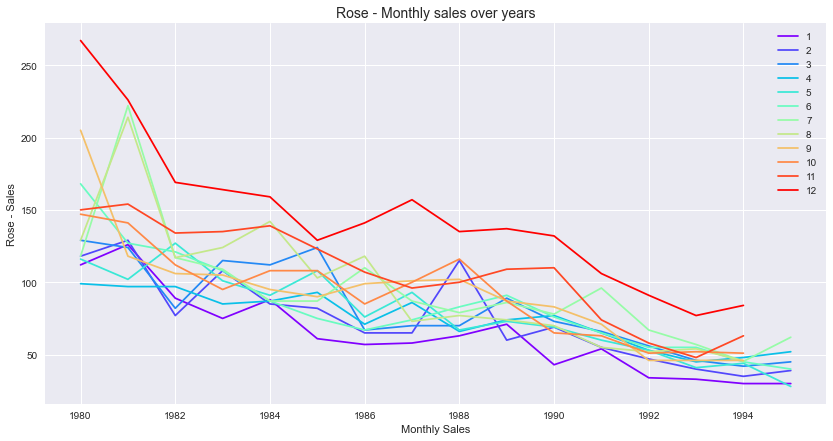

In [24]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Rose - Sales')
plt.xlabel('Monthly Sales')
plt.title('Rose - Monthly sales over years', fontsize=14)

#### Plot the average sales per month and the month on month percentage change of sales.

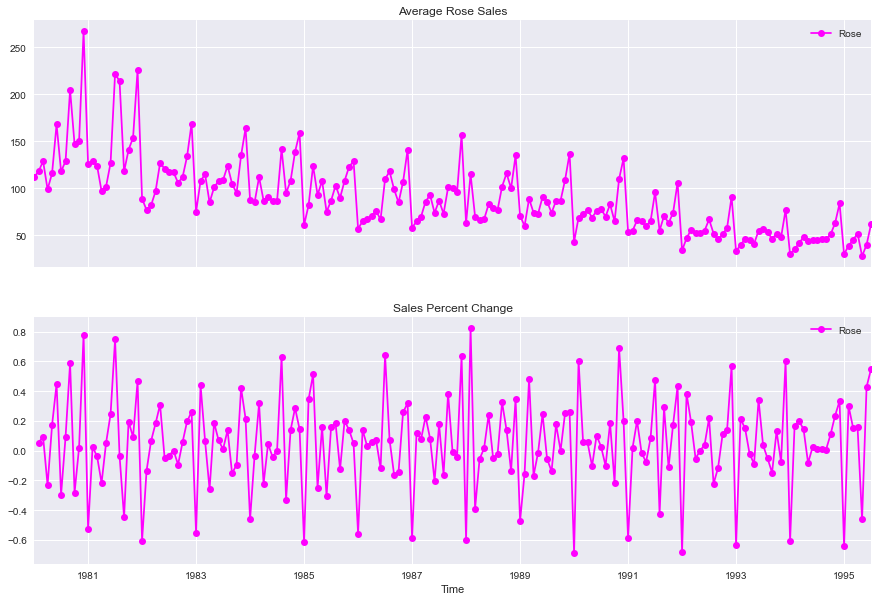

In [25]:
# group by date and get average Sparkling & Rose sales, and precent change
average_r    = df_rose.groupby(df_rose.index)['Rose'].mean()
pct_change_r = df_rose.groupby(df_rose.index)['Rose'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,10))

# plot average Rose sales over time(year-month)
ax1 = average_r.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales", color = 'magenta')

# plot precent change for Sales over time(year-month)
ax2 = pct_change_r.plot(legend=True,ax=axis2,marker='o',color='magenta',title="Sales Percent Change")
plt.xlabel('Time')
plt.legend(loc='best');

#### Decompose the Time Series and plot the different components.

If the seasonality and residual components are independent of the trend, then you have an additive series. If the seasonality and residual components are in fact dependent, meaning they fluctuate on trend, then you have a multiplicative series.

In [26]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

##### Additive Decomposition

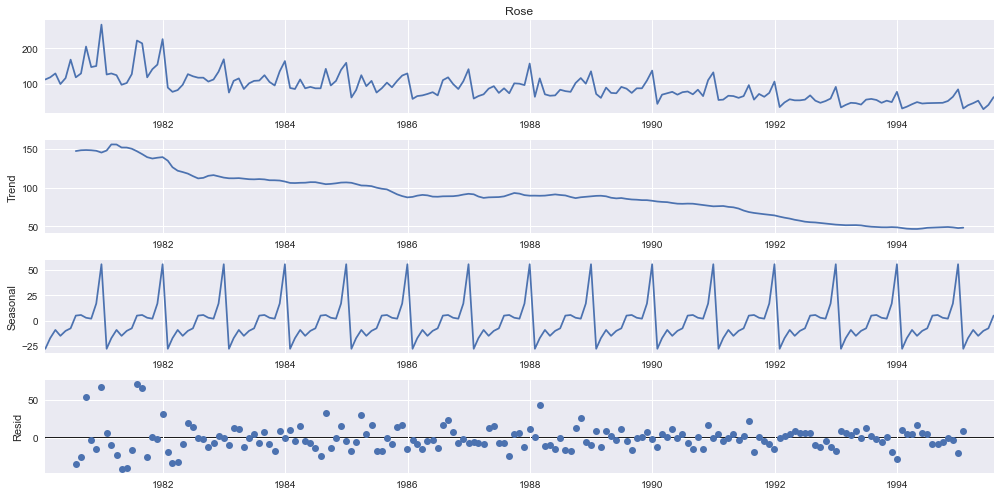

In [27]:
decomposition = seasonal_decompose(df_rose['Rose'],model='additive')
decomposition.plot();

In [28]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908708
1980-02-29   -17.435675
1980-03-31    -9.285895
1980-04-30   -15.098395
1980-05-31   -10.196609
1980-06-30    -7.678752
1980-07-31     4.897089
1980-08-31     5.500109
1980-09-30     2.774625
1980-10-31     1.871848
1980-11-30    16.846848
1980-12-31    55.713514
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980423
1980-08-31   -24.625109
1980-09-30    53.850375
1980-10-31    -2.955181
1980-11-30   -14.263514
1980-12-31    66.16

In [29]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    113.102911
1980-08-31    123.499891
1980-09-30    202.225375
1980-10-31    145.128152
1980-11-30    133.153152
1980-12-31    211.286486
dtype: float64

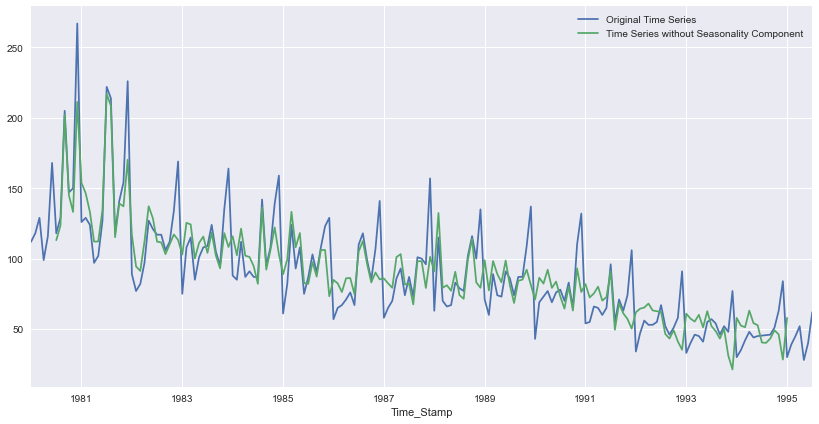

In [30]:
df_rose.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

##### Multiplicative Decomposition

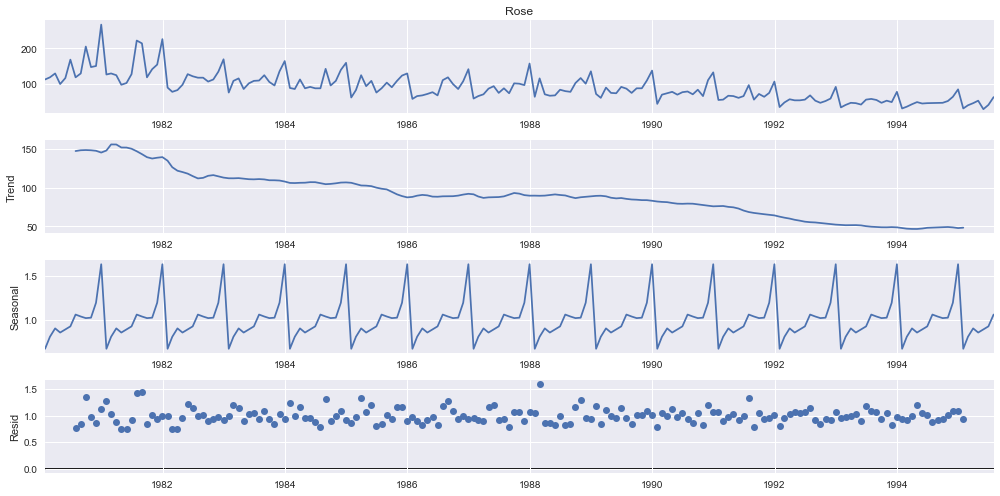

In [35]:
decomposition1 = seasonal_decompose(df_rose['Rose'],model='multiplicative')
decomposition1.plot();

In [36]:
trend1 = decomposition1.trend
seasonality1 = decomposition1.seasonal
residual1 = decomposition1.resid

print('Trend','\n',trend1.head(12),'\n')
print('Seasonality','\n',seasonality1.head(12),'\n')
print('Residual','\n',residual1.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058042
1980-08-31    1.035890
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758256
1980-08-31    0.840713
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: resid, dtype:

In [37]:
deaseasonalized_ts1 = trend1 + residual1
deaseasonalized_ts1.head(12)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.841589
1980-08-31    148.965713
1980-09-30    149.732675
1980-10-31    149.054105
1980-11-30    148.270046
1980-12-31    146.254647
dtype: float64

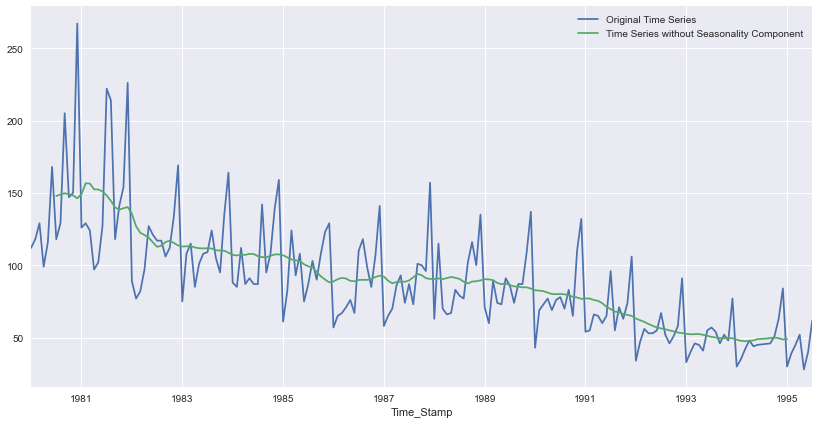

In [38]:
df_rose.plot()
deaseasonalized_ts1.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

## 3. Split the data into training and test. The test data should start in 1991.

#### Split the time series

In [40]:
train=df_rose[df_rose.index.year < 1991]
test=df_rose[df_rose.index.year >= 1991]

In [41]:
from IPython.display import display

In [42]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [43]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


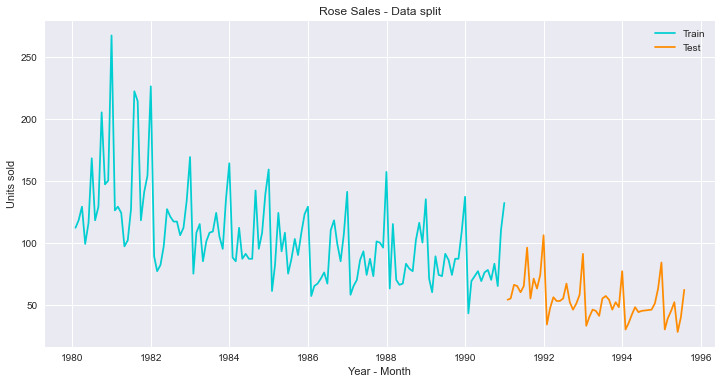

In [44]:
plt.figure(figsize = (12, 6))
plt.plot(train['Rose'], label = 'Train', color='darkturquoise')
plt.plot(test['Rose'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.show;

#### Model 1: Linear Regression

In [45]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [46]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [47]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [49]:
LinearRegression_train['RegOnTime_Rose'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_Rose'] = lr.predict(LinearRegression_test[['time']])

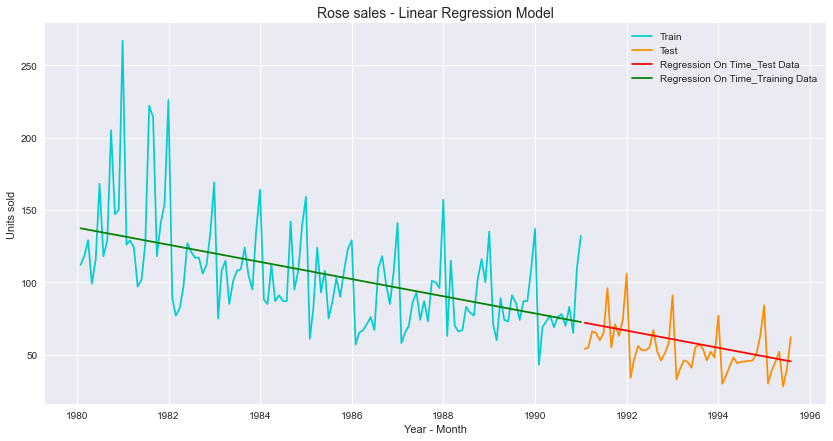

In [50]:
plt.plot( train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(test['Rose'], label='Test', color = 'darkorange')
plt.plot(LinearRegression_test['RegOnTime_Rose'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_Rose'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose sales - Linear Regression Model', fontsize = 14);

#### LR - Model Evaluation

In [51]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [52]:
# LR Training Data - RMSE and MAPE

rmse_rose_model1_train = metrics.mean_squared_error(train['Rose'],LinearRegression_train['RegOnTime_Rose'],squared=False)
mape_rose_model1_train = MAPE(train['Rose'],LinearRegression_train['RegOnTime_Rose'])
print("For RegressionOnTime forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_train, mape_rose_model1_train))

For RegressionOnTime forecast on the Rose Training Data:  RMSE is 30.718 and MAPE is 21.22


In [54]:
## Rose testing Data - RMSE and MAPE

rmse_rose_model1_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime_Rose'],squared=False)
mape_rose_model1_test = MAPE(test['Rose'],LinearRegression_test['RegOnTime_Rose'])
print("For RegressionOnTime forecast on the Rose testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_test, mape_rose_model1_test))

For RegressionOnTime forecast on the Rose testing Data:  RMSE is 15.269 and MAPE is 22.82


In [55]:
rose_resultsDf = pd.DataFrame({'Test RMSE': [rmse_rose_model1_test],'Test MAPE': [mape_rose_model1_test]},index=['RegressionOnTime'])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82

#### Model 2: Naive forecast

In [56]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [57]:
NaiveModel_train['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['rose_naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: rose_naive, dtype: float64

In [58]:
NaiveModel_test['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['rose_naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: rose_naive, dtype: float64

Text(0.5, 1.0, 'Rose - Naive Forecast')

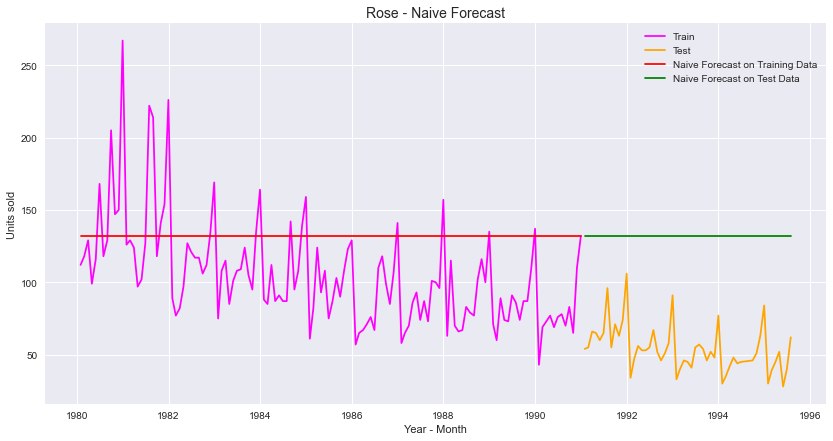

In [59]:
plt.plot(NaiveModel_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - Naive Forecast", fontsize = 14)

#### Naive Model Evauation

In [60]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['rose_naive'],squared=False)
mape_rose_model2_train = MAPE(train['Rose'],NaiveModel_train['rose_naive'])
print("For Naive forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_train, mape_rose_model2_train))

For Naive forecast on the Rose Training Data:  RMSE is 45.064 and MAPE is 36.38


In [61]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['rose_naive'],squared=False)
mape_rose_model2_test = MAPE(test['Rose'],NaiveModel_test['rose_naive'])
print("For Naive forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_test, mape_rose_model2_test))

For Naive forecast on the Rose Testing Data:  RMSE is 79.719 and MAPE is 145.10


In [62]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model2_test],'Test MAPE': [mape_rose_model2_test]},index=['NaiveModel'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10

#### Model 3: Simple Average

In [63]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [64]:
SimpleAverage_train['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_train['rose_mean_forecast'].head()

Time_Stamp
1980-01-31    104.939394
1980-02-29    104.939394
1980-03-31    104.939394
1980-04-30    104.939394
1980-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

In [65]:
SimpleAverage_test['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'].head()

Time_Stamp
1991-01-31    104.939394
1991-02-28    104.939394
1991-03-31    104.939394
1991-04-30    104.939394
1991-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Rose - SimpleAverage Forecast')

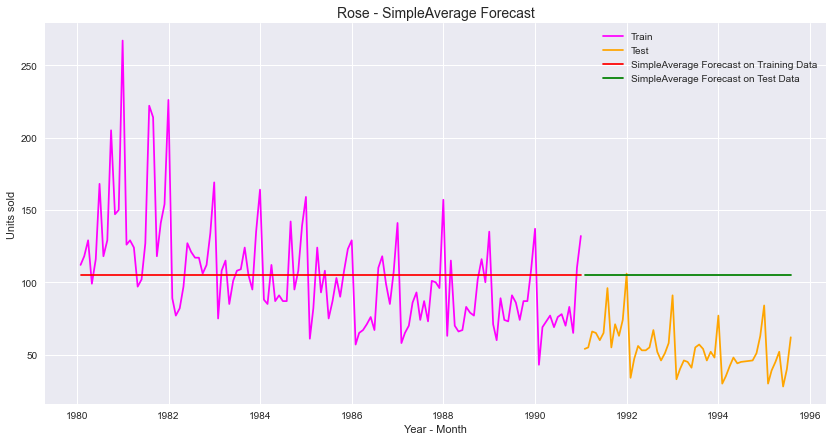

In [66]:
#plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - SimpleAverage Forecast", fontsize=14)

##### SA Model Evaluation

In [67]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['rose_mean_forecast'],squared=False)
mape_rose_model3_train = MAPE(train['Rose'],SimpleAverage_train['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_train, mape_rose_model3_train))

For Simple Average forecast on the Rose Training Data:  RMSE is 36.034 and MAPE is 25.39


In [68]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
mape_rose_model3_test = MAPE(test['Rose'],SimpleAverage_test['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_test, mape_rose_model3_test))

For Simple Average forecast on the Rose Testing Data:  RMSE is 53.460 and MAPE is 94.93


In [69]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model3_test],'Test MAPE': [mape_rose_model3_test]},index=['SimpleAverage'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93

#### Model 4: Moving Average

In [71]:
MovingAverage = df_rose.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [73]:
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head()

Rose  Rose_Trailing_2  Rose_Trailing_4  Rose_Trailing_6  \
Time_Stamp                                                             
1980-01-31  112.0              NaN              NaN              NaN   
1980-02-29  118.0            115.0              NaN              NaN   
1980-03-31  129.0            123.5              NaN              NaN   
1980-04-30   99.0            114.0            114.5              NaN   
1980-05-31  116.0            107.5            115.5              NaN   

            Rose_Trailing_9  
Time_Stamp                   
1980-01-31              NaN  
1980-02-29              NaN  
1980-03-31              NaN  
1980-04-30              NaN  
1980-05-31              NaN

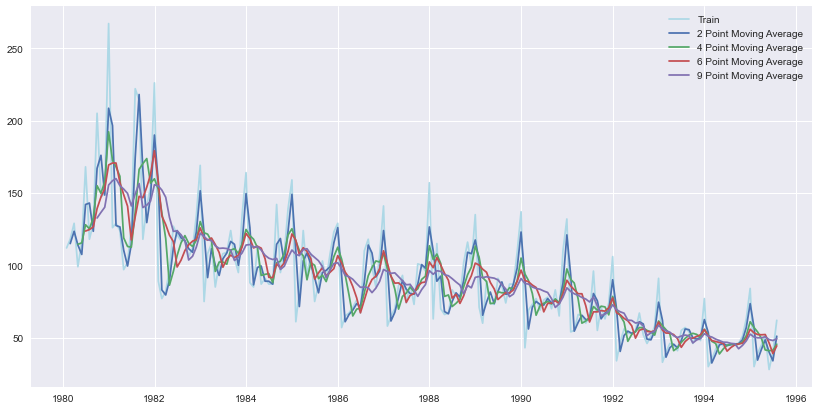

In [74]:
plt.plot(MovingAverage['Rose'], label='Train', color='lightblue')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [75]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Rose - Trailing Moving Average Forecast')

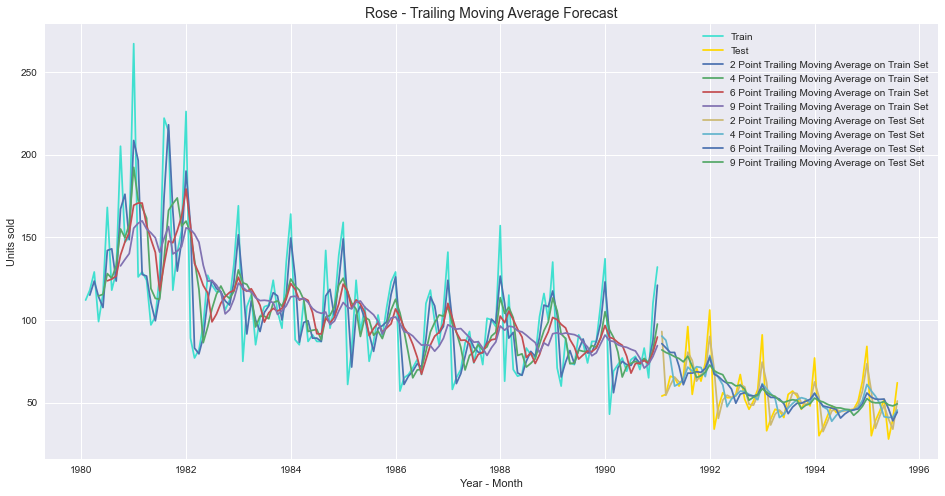

In [76]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Rose - Trailing Moving Average Forecast", fontsize=14)

##### MA Model Evaluation

MA is done only on Test Data

In [77]:
## Test Data - rmse_rose and mape_rose --> 2 point rose_Trailing MA

rmse_rose_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)
mape_rose_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_2, mape_rose_model4_test_2))

## Test Data - rmse_rose and mape_rose --> 4 point rose_Trailing MA

rmse_rose_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)
mape_rose_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_4, mape_rose_model4_test_4))

## Test Data - rmse_rose and mape_rose --> 6 point rose_Trailing MA

rmse_rose_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)
mape_rose_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_6, mape_rose_model4_test_6))

## Test Data - rmse_rose and mape_rose --> 9 point rose_Trailing MA

rmse_rose_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)
mape_rose_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_9, mape_rose_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is 11.529 mape_rose is 13.54
For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.451 mape_rose is 19.49
For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.566 mape_rose is 20.82
For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.728 mape_rose is 21.01


In [78]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_rose_model4_test_2,rmse_rose_model4_test_4
                                          ,rmse_rose_model4_test_6,rmse_rose_model4_test_9]
                            ,'Test MAPE': [mape_rose_model4_test_2,mape_rose_model4_test_4,
                                           mape_rose_model4_test_6,mape_rose_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_4])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93
2 point TMA       11.529278      13.54
4 point TMA       14.451364      19.49
6 point TMA       14.566269      20.82
9 point TMA       14.727594      21.01

#### Model 5: Simple Exponential Smoothing

In [79]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [80]:
SES_train = train.copy()
SES_test = test.copy()

In [81]:
model_rose = SimpleExpSmoothing(SES_train['Rose'])
#model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)

Test: For alpha = 0.10,  RMSE is 36.8278 MAPE is 63.94
For smoothing level = 0.10,  Initial level 112.00


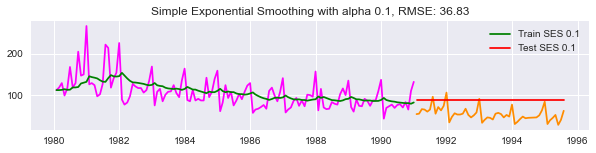

Test: For alpha = 0.20,  RMSE is 41.3617 MAPE is 72.21
For smoothing level = 0.20,  Initial level 112.00


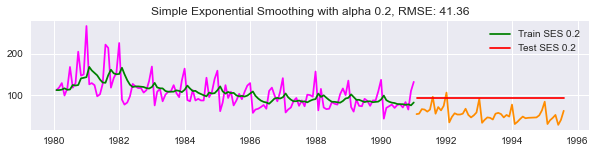

Test: For alpha = 0.30,  RMSE is 47.5046 MAPE is 83.71
For smoothing level = 0.30,  Initial level 112.00


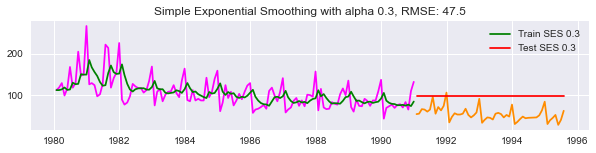

Test: For alpha = 0.50,  RMSE is 59.6416 MAPE is 106.81
For smoothing level = 0.50,  Initial level 112.00


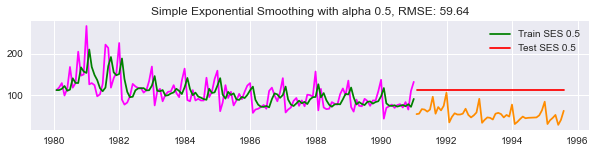

Test: For alpha = 0.99,  RMSE is 79.4985 MAPE is 144.69
For smoothing level = 0.99,  Initial level 112.00


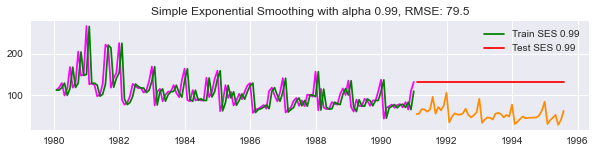

In [82]:
alpha_list = [0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model_rose.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Rose']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Rose'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Rose'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Rose'], color = 'magenta')
    plt.plot(test['Rose'], color = 'darkorange')
    plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
    plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    plt.legend(loc='best') 
    plt.show()

In [83]:
model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)
model_SES_autofit2.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
SES_train['predict_rose'] = model_SES_autofit2.fittedvalues
SES_train.head()

Rose  predict_rose
Time_Stamp                     
1980-01-31  112.0    134.387202
1980-02-29  118.0    132.176481
1980-03-31  129.0    130.776564
1980-04-30   99.0    130.601129
1980-05-31  116.0    127.480539

In [85]:
SES_test['predict_rose'] = model_SES_autofit2.forecast(steps=len(SES_test))
SES_test.head()

Rose  predict_rose
Time_Stamp                    
1991-01-31  54.0     87.104983
1991-02-28  55.0     87.104983
1991-03-31  66.0     87.104983
1991-04-30  65.0     87.104983
1991-05-31  60.0     87.104983

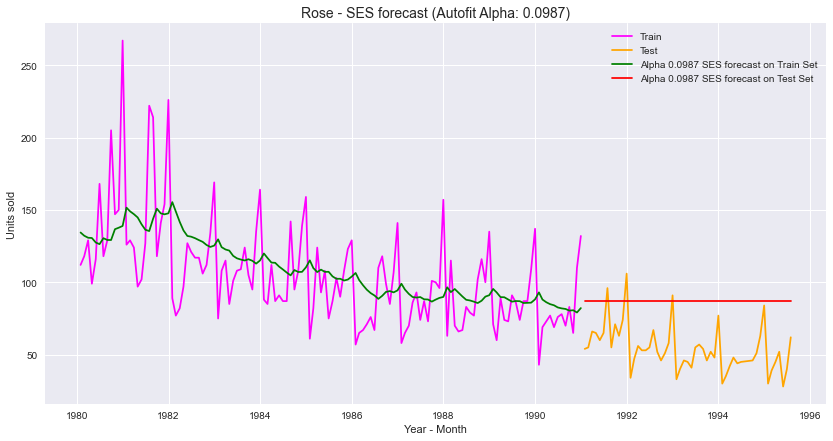

In [86]:
#plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train', color = 'magenta')
plt.plot(SES_test['Rose'], label='Test', color = 'orange')

plt.plot(SES_train['predict_rose'],color = 'green', label='Alpha 0.0987 SES forecast on Train Set')
plt.plot(SES_test['predict_rose'],color = 'red', label='Alpha 0.0987 SES forecast on Test Set')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose - SES forecast (Autofit Alpha: 0.0987)', fontsize = 14);

##### SES Model Evaluation

In [87]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model5_train = metrics.mean_squared_error(train['Rose'],SES_train['predict_rose'],squared=False)
mape_rose_model5_train = MAPE(train['Rose'],SES_train['predict_rose'])
print("For SES forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_train, mape_rose_model5_train))

For SES forecast on the Rose Training Data:  RMSE is 31.501 and MAPE is 22.73


In [88]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model5_test = metrics.mean_squared_error(test['Rose'],SES_test['predict_rose'],squared=False)
mape_rose_model5_test = MAPE(test['Rose'],SES_test['predict_rose'])
print("For SES forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_test, mape_rose_model5_test))

For SES forecast on the Rose Testing Data:  RMSE is 36.796 and MAPE is 63.88


In [89]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_rose_model5_test],'Test MAPE': [mape_rose_model5_test]},index=['SES Alpha 0.01'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_5])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93
2 point TMA       11.529278      13.54
4 point TMA       14.451364      19.49
6 point TMA       14.566269      20.82
9 point TMA       14.727594      21.01
SES Alpha 0.01    36.796004      63.88

#### Model 6: Double Exponential Smoothing (Holt's Model)

In [90]:
DES_train = train.copy()
DES_test = test.copy()

In [91]:
model_DES_rose = Holt(DES_train['Rose'])

In [92]:
resultsDf_6_rose = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_rose_alpha_i_j = model_DES_rose.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_rose',i,j] = model_DES_rose_alpha_i_j.fittedvalues
        DES_test['predict_rose',i,j] = model_DES_rose_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',i,j],squared=False)
        mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',i,j])
        
        rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',i,j],squared=False)
        mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',i,j])
        
        resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [93]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056911      64.02
1     0.1   0.2   32.685228       23.63  48.806921      83.29
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   32.925494       24.23  78.209401     131.33
20    0.3   0.1   33.528397       23.47  98.653063     170.12

In [94]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056911      64.02
1     0.1   0.2   32.685228       23.63  48.806921      83.29
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   32.925494       24.23  78.209401     131.33
3     0.1   0.4   33.179749       24.75  99.554566     165.49

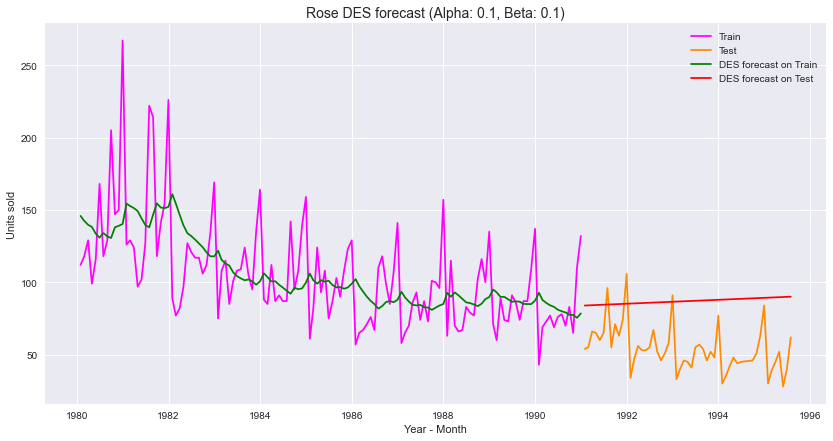

In [95]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_rose', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_rose', 0.1, 0.1], color = 'red', label='DES forecast on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Alpha: 0.1, Beta: 0.1)', fontsize=14);
plt.legend(loc='best');

In [96]:
# Attempting autofit

model_DES_rose_autofit = model_DES_rose.fit(optimized=True,use_brute=True)

In [97]:
model_DES_rose_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
alpha = model_DES_rose_autofit.params['smoothing_level']
beta = model_DES_rose_autofit.params['smoothing_trend']
alpha_6_2 = alpha
beta_6_2 = beta

In [99]:
DES_train['predict_rose',alpha,beta] = model_DES_rose_autofit.fittedvalues

In [100]:
DES_test['predict_rose',alpha,beta] = model_DES_rose_autofit.forecast(len(test['Rose']))

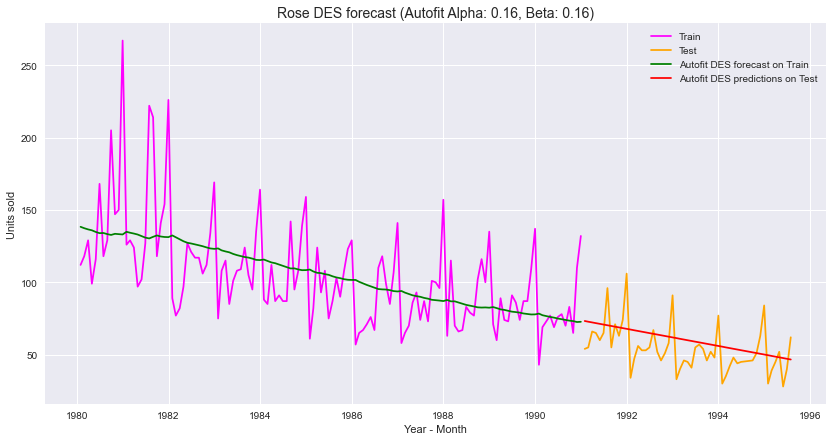

In [101]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'orange')

plt.plot(DES_train['predict_rose',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_rose',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Autofit Alpha: 0.16, Beta: 0.16)', fontsize=14)

plt.legend(loc='best')

In [102]:
rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',alpha,beta],squared=False)
mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',alpha,beta])
        
rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',alpha,beta],squared=False)
mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',alpha,beta])
        
resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [103]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
100  0.01755  0.000032   30.890794       21.61  15.706968      24.12
0    0.10000  0.100000   32.026565       22.78  37.056911      64.02
1    0.10000  0.200000   32.685228       23.63  48.806921      83.29
10   0.20000  0.100000   32.796403       23.06  65.731352     113.20
2    0.10000  0.300000   32.925494       24.23  78.209401     131.33

In [104]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
100  0.01755  0.000032   30.890794       21.61  15.706968      24.12
0    0.10000  0.100000   32.026565       22.78  37.056911      64.02
1    0.10000  0.200000   32.685228       23.63  48.806921      83.29
10   0.20000  0.100000   32.796403       23.06  65.731352     113.20
2    0.10000  0.300000   32.925494       24.23  78.209401     131.33

##### DES Model Evaluation

In [105]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE':[resultsDf_6_rose['Test RMSE'][100],resultsDf_6_rose['Test RMSE'][0]],
                              'Test MAPE':[resultsDf_6_rose['Test MAPE'][100],resultsDf_6_rose['Test MAPE'][0]]}
                           ,index=['DES Alpha 0.16, Beta 0.16','DES Alpha 0.10, Beta 0.10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_6_1])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime           15.268885      22.82
NaiveModel                 79.718559     145.10
SimpleAverage              53.460350      94.93
2 point TMA                11.529278      13.54
4 point TMA                14.451364      19.49
6 point TMA                14.566269      20.82
9 point TMA                14.727594      21.01
SES Alpha 0.01             36.796004      63.88
DES Alpha 0.16, Beta 0.16  15.706968      24.12
DES Alpha 0.10, Beta 0.10  37.056911      64.02

#### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [106]:
TES_train = train.copy()
TES_test = test.copy()

In [107]:
model_TES_2 = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [108]:
resultsDf_7_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})

In [109]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_2.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_rose',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_rose',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Rose']))
        
            rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',i,j,k],squared=False)
            mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',i,j,k])
        
            rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',i,j,k],squared=False)
            mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [110]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171615      13.19
11     0.1   0.2    0.2   20.140683       14.66   9.493835      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71
142    0.2   0.5    0.3   23.300524       17.35   9.885717      14.21
12     0.1   0.2    0.3   20.725703       14.88   9.896169      14.16

In [111]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171615      13.19
243    0.3   0.5    0.4   25.873405       17.54  10.375309      13.26
223    0.3   0.3    0.4   24.209084       16.78  10.169698      13.67
11     0.1   0.2    0.2   20.140683       14.66   9.493835      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71

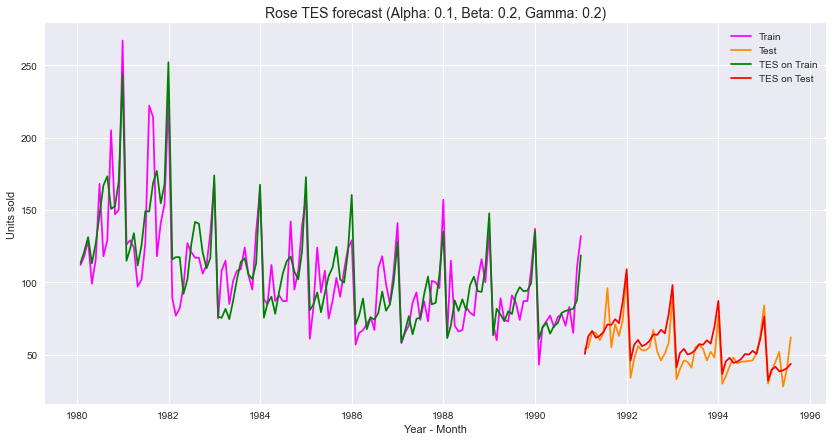

In [112]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

#plt.plot(TES_train['predict_rose', 0.2, 0.6, 0.2], color = 'green', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Train')
#plt.plot(TES_test['predict_rose', 0.2, 0.6, 0.2], color='red', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Test')

plt.plot(TES_train['predict_rose', 0.1, 0.2, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose', 0.1, 0.2, 0.2], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

In [113]:
# Attempt autofit

model_TES_autofit = model_TES_2.fit(optimized=True,use_brute=True)

In [114]:
model_TES_autofit.params

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [115]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_2 = alpha
beta_7_2 = beta
gamma_7_2 = gamma

In [116]:
TES_train['predict_rose',alpha,beta,gamma] = model_TES_autofit.fittedvalues

TES_test['predict_rose',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Rose']))

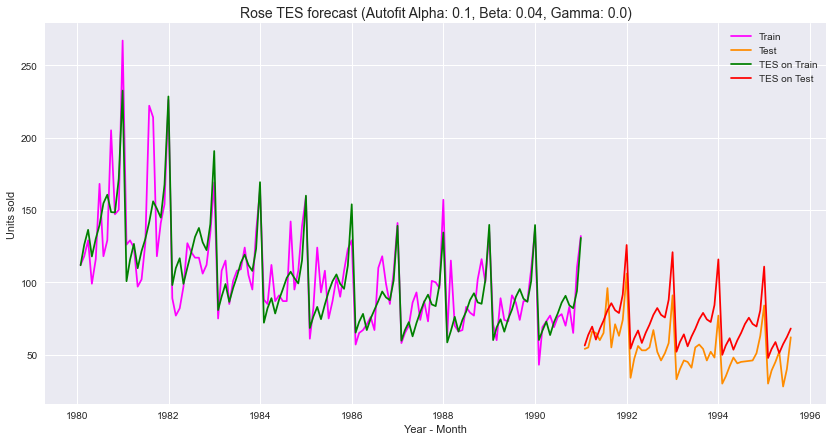

In [117]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_rose',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Autofit Alpha: 0.1, Beta: 0.04, Gamma: 0.0)', fontsize=14)

plt.legend(loc='best')

In [118]:
rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma])
        
rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma])
        
resultsDf_7_2 = resultsDf_7_2.append({'Alpha':alpha,'Beta':beta,'Gamma':gamma,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [119]:
resultsDf_7_2.tail()

Alpha      Beta     Gamma    Train RMSE  Train MAPE    Test RMSE  \
996   1.000000  1.000000  0.700000   3091.001599      890.00  9721.144050   
997   1.000000  1.000000  0.800000   2438.212926      628.69  2573.842682   
998   1.000000  1.000000  0.900000  28835.801098     3026.25  3522.899085   
999   1.000000  1.000000  1.000000   1577.905281      583.77  3104.659378   
1000  0.071511  0.045292  0.000072     18.406337       12.58    20.156483   

      Test MAPE  
996    13046.06  
997     1998.89  
998     2624.26  
999     3720.26  
1000      33.63

In [120]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171615      13.19
11     0.1   0.2    0.2   20.140683       14.66   9.493835      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71
142    0.2   0.5    0.3   23.300524       17.35   9.885717      14.21
12     0.1   0.2    0.3   20.725703       14.88   9.896169      14.16

In [121]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171615      13.19
243    0.3   0.5    0.4   25.873405       17.54  10.375309      13.26
223    0.3   0.3    0.4   24.209084       16.78  10.169698      13.67
11     0.1   0.2    0.2   20.140683       14.66   9.493835      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71

##### TES Model Evaluation

In [122]:
resultsDf_7_ro = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][11],resultsDf_7_2['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_2['Test MAPE'][11],resultsDf_7_2['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.1, Beta 0.2, Gamma 0.2','TES Alpha 0.11, Beta 0.05, Gamma 0.00'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7_ro])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493835      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  20.156483      33.63

In [123]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493835      13.68
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
RegressionOnTime                       15.268885      22.82
DES Alpha 0.16, Beta 0.16              15.706968      24.12
TES Alpha 0.11, Beta 0.05, Gamma 0.00  20.156483      33.63
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
NaiveModel                             79.718559     145.10

##### Plot all above models

Text(0.5, 1.0, 'ROSE : Forecast Vs Actual Test Data')

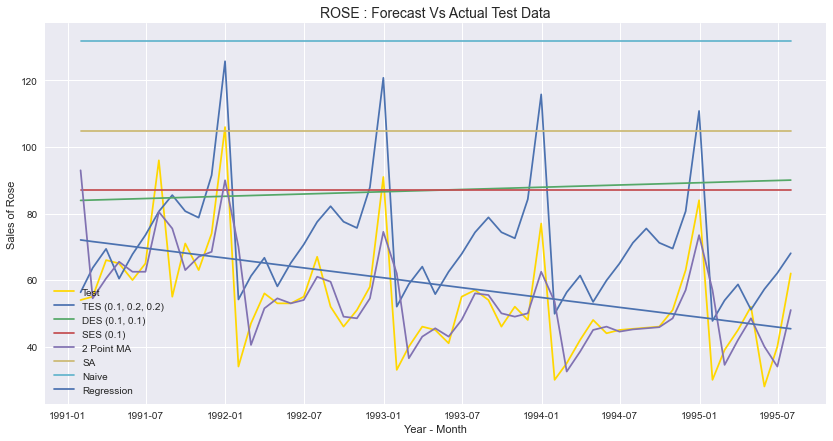

In [125]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'gold')
#TES
#plt.plot(TES_train['predict_rose',alpha_7_2,beta_7_2,gamma_7_2], label='TES on Train')
#DES
#plt.plot(DES_train['predict_rose',0.1,0.1], label='DES on Train')
#SES
#plt.plot(SES_train['predict_rose'], label='SES on Train')
#MA
#plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point MA on Train')
#SA
#plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SA on Train')
#Naive
#plt.plot(NaiveModel_train['rose_naive'], label='Naive on Train')
#Regression
#plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression on Train')

#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES (0.1, 0.2, 0.2)')
#DES
plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES (0.1, 0.1)')
#SES
plt.plot(SES_test['predict_rose'],  label='SES (0.1)')
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_Rose'], label='Regression')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Sales of Rose')
plt.title('ROSE : Forecast Vs Actual Test Data', fontsize=14)

### ARIMA Models

#### Check for stationarity of the whole Time Series data.

In [126]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

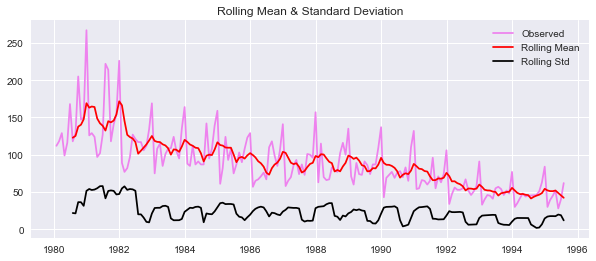

Results of Dickey-Fuller Test:
Test Statistic                  -1.876719
p-value                          0.343091
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [127]:
plt.figure(figsize=(10,4))
test_stationarity(df_rose['Rose'], 'violet')

We see that at 5% significant level the Time Series is non-stationary.

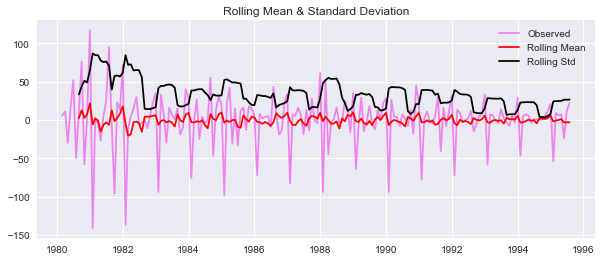

Results of Dickey-Fuller Test:
Test Statistic                -8.044395e+00
p-value                        1.810868e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [128]:
plt.figure(figsize=(10,4))
test_stationarity(df_rose['Rose'].diff().dropna(), 'violet')

At difference of order 1, Rose Time Series is stationary with no trend. Got visible seasoality (additive or mutiplicative?)

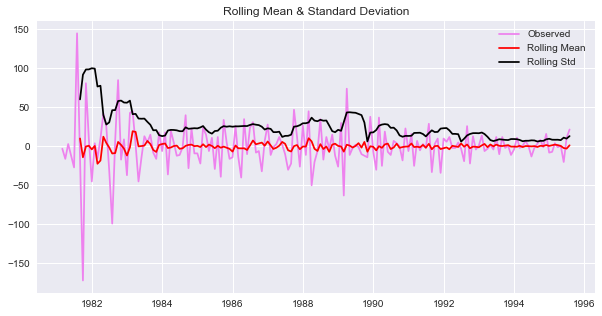

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [129]:
plt.figure(figsize=(10,5))
test_stationarity((df_rose['Rose'].diff(12).dropna()).diff().dropna(), 'violet')

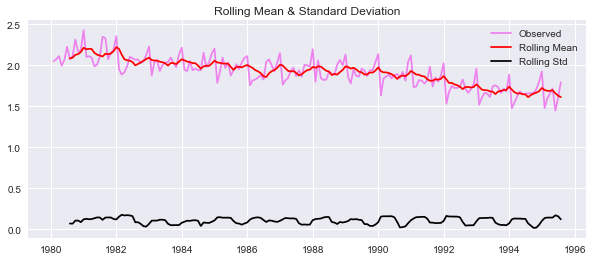

Results of Dickey-Fuller Test:
Test Statistic                  -0.422555
p-value                          0.906264
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [130]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df_rose['Rose']), 'violet')

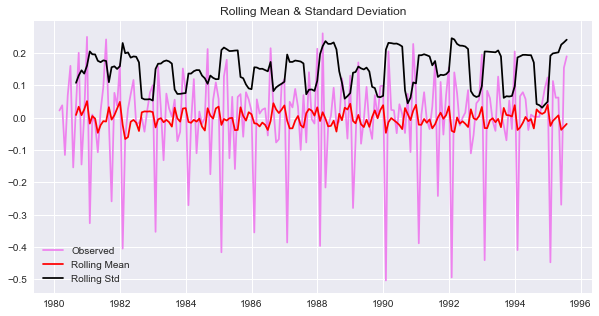

Results of Dickey-Fuller Test:
Test Statistic                -8.669696e+00
p-value                        4.581847e-14
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [131]:
plt.figure(figsize=(10,5))
test_stationarity(np.log10(df_rose['Rose']).diff().dropna(), 'violet')

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [132]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

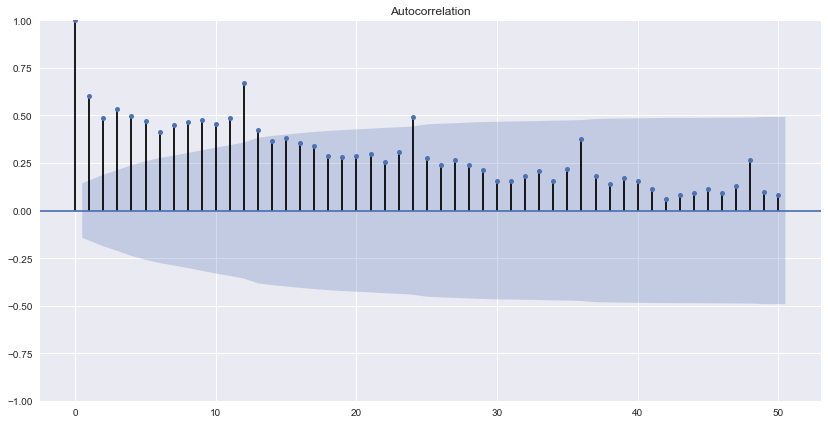

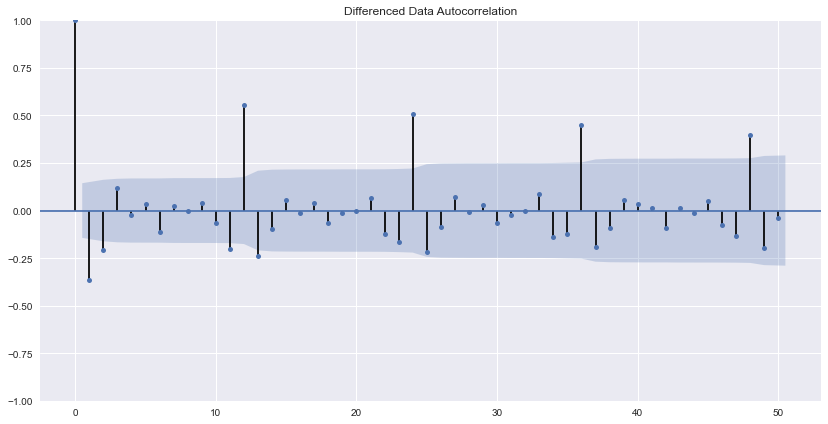

In [133]:
plot_acf(df_rose['Rose'],lags=50)
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

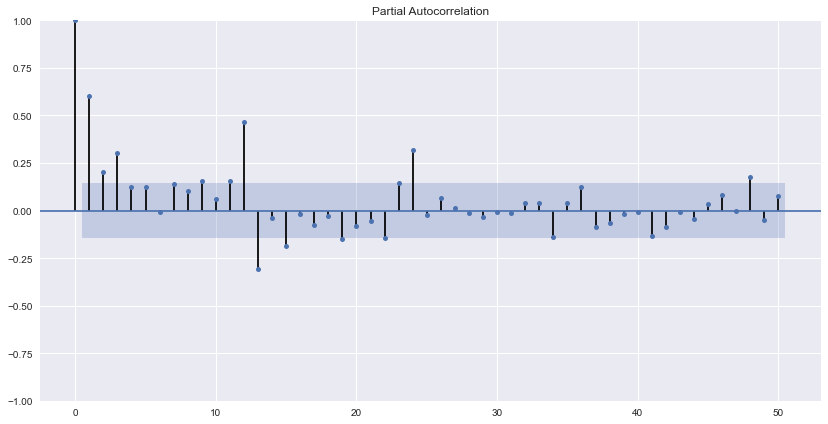

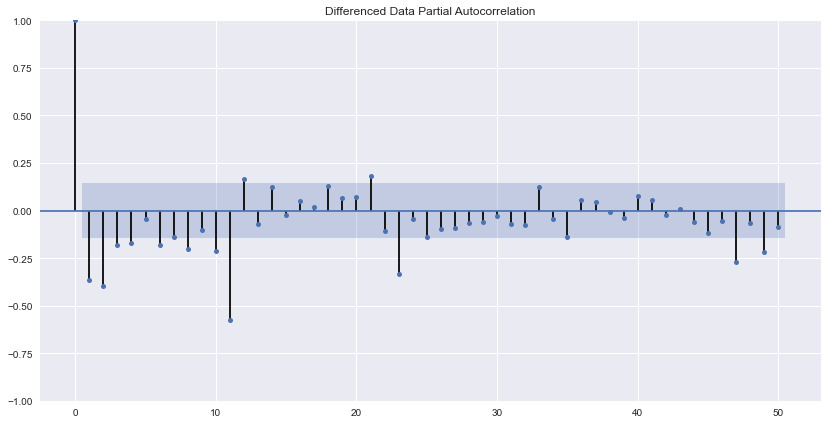

In [134]:
plot_pacf(df_rose['Rose'],lags=50)
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Model 8: SARIMA

In [135]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

#### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).
AUTO SARIMA on original data

In [145]:
import itertools
p = q = range(0,4)
d = range(1,2)
D = range(1,2)


pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (0, 1, 3)(0, 1, 3, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (1, 1, 3)(1, 1, 3, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)
Model: (2, 1, 3)(2, 1, 3, 6)
Model: (3, 1, 0)(3, 1, 0, 6)
Model: (3, 1, 1)(3, 1, 1, 6)
Model: (3, 1, 2)(3, 1, 2, 6)
Model: (3, 1, 3)(3, 1, 3, 6)


In [146]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [147]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 6)7 - AIC:1362.6525264429365
SARIMA(0, 1, 0)x(0, 1, 1, 6)7 - AIC:1185.4374421231744
SARIMA(0, 1, 0)x(0, 1, 2, 6)7 - AIC:1085.222176554119
SARIMA(0, 1, 0)x(0, 1, 3, 6)7 - AIC:990.5887854028847
SARIMA(0, 1, 0)x(1, 1, 0, 6)7 - AIC:1170.9535453581288
SARIMA(0, 1, 0)x(1, 1, 1, 6)7 - AIC:1159.57330556241
SARIMA(0, 1, 0)x(1, 1, 2, 6)7 - AIC:1055.7799643055246
SARIMA(0, 1, 0)x(1, 1, 3, 6)7 - AIC:966.91772764433
SARIMA(0, 1, 0)x(2, 1, 0, 6)7 - AIC:1087.9645416255823
SARIMA(0, 1, 0)x(2, 1, 1, 6)7 - AIC:1063.3058015292745
SARIMA(0, 1, 0)x(2, 1, 2, 6)7 - AIC:1057.8948378621144
SARIMA(0, 1, 0)x(2, 1, 3, 6)7 - AIC:967.4811852996736
SARIMA(0, 1, 0)x(3, 1, 0, 6)7 - AIC:972.6644364360237
SARIMA(0, 1, 0)x(3, 1, 1, 6)7 - AIC:972.6264651824519
SARIMA(0, 1, 0)x(3, 1, 2, 6)7 - AIC:974.6258997941511
SARIMA(0, 1, 0)x(3, 1, 3, 6)7 - AIC:965.5753080827312
SARIMA(0, 1, 1)x(0, 1, 0, 6)7 - AIC:1305.2519512333342
SARIMA(0, 1, 1)x(0, 1, 1, 6)7 - AIC:1133.373879696572
SARIMA(0, 1, 1)x(0, 1, 

SARIMA(2, 1, 1)x(1, 1, 3, 6)7 - AIC:922.3636511556567
SARIMA(2, 1, 1)x(2, 1, 0, 6)7 - AIC:996.5671248716222
SARIMA(2, 1, 1)x(2, 1, 1, 6)7 - AIC:989.8750414464076
SARIMA(2, 1, 1)x(2, 1, 2, 6)7 - AIC:968.5764361256219
SARIMA(2, 1, 1)x(2, 1, 3, 6)7 - AIC:924.3635472431283
SARIMA(2, 1, 1)x(3, 1, 0, 6)7 - AIC:914.9052783873492
SARIMA(2, 1, 1)x(3, 1, 1, 6)7 - AIC:916.8748001677476
SARIMA(2, 1, 1)x(3, 1, 2, 6)7 - AIC:922.6244082364544
SARIMA(2, 1, 1)x(3, 1, 3, 6)7 - AIC:926.3191367563295
SARIMA(2, 1, 2)x(0, 1, 0, 6)7 - AIC:1278.739038663575
SARIMA(2, 1, 2)x(0, 1, 1, 6)7 - AIC:1116.9299065777116
SARIMA(2, 1, 2)x(0, 1, 2, 6)7 - AIC:1011.138401275283
SARIMA(2, 1, 2)x(0, 1, 3, 6)7 - AIC:939.1731278570272
SARIMA(2, 1, 2)x(1, 1, 0, 6)7 - AIC:1094.6959813412846
SARIMA(2, 1, 2)x(1, 1, 1, 6)7 - AIC:1084.493856657153
SARIMA(2, 1, 2)x(1, 1, 2, 6)7 - AIC:957.8063043692773
SARIMA(2, 1, 2)x(1, 1, 3, 6)7 - AIC:926.587576823762
SARIMA(2, 1, 2)x(2, 1, 0, 6)7 - AIC:994.9724170428315
SARIMA(2, 1, 2)x(2, 1, 1, 6

In [148]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param      seasonal         AIC
187  (2, 1, 3)  (2, 1, 3, 6)  889.189499
251  (3, 1, 3)  (2, 1, 3, 6)  891.128678
255  (3, 1, 3)  (3, 1, 3, 6)  893.125602
183  (2, 1, 3)  (1, 1, 3, 6)  894.757072
63   (0, 1, 3)  (3, 1, 3, 6)  894.905688

In [149]:
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(2, 1, 3),
                                seasonal_order=(2, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 6)   Log Likelihood                -433.595
Date:                           Wed, 02 Feb 2022   AIC                            889.189
Time:                                   21:30:21   BIC                            918.172
Sample:                                        0   HQIC                           900.928
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5746      0.023     25.057      0.000       0.530       0.620
ar.L2         -0.9163      0.021    -43.652

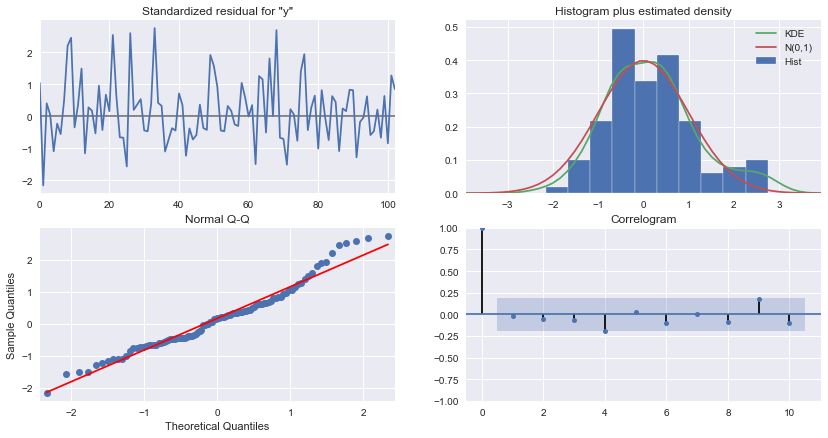

In [150]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

In [151]:
pred_dynamic = results_auto_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [152]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [153]:
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  54.885047  15.045514      25.396382      84.373713
1  63.983030  15.157705      34.274475      93.691585
2  71.826234  15.455041      41.534910     102.117558
3  69.042010  15.807487      38.059904     100.024116
4  77.050275  15.993124      45.704329     108.396221

In [154]:
# Extract the predicted and true values of our time series
rose_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_auto_forecasted'] = predicted_auto_SARIMA_rose.predicted_mean
SARIMA_test.head()

Rose  rose_auto_forecasted
Time_Stamp                            
1991-01-31  54.0             54.885047
1991-02-28  55.0             63.983030
1991-03-31  66.0             71.826234
1991-04-30  65.0             69.042010
1991-05-31  60.0             77.050275

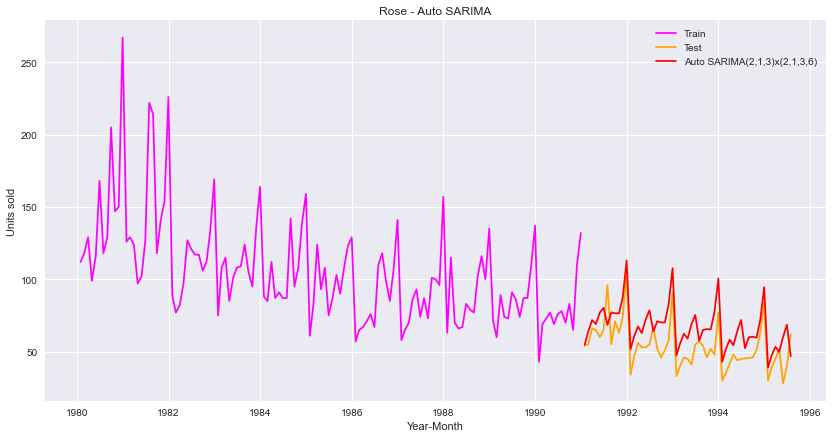

In [155]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_auto_forecasted'], color='red', label='Auto SARIMA(2,1,3)x(2,1,3,6)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA')
plt.legend(loc='best')

In [156]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_auto_forecasted'])
print("For SARIMA forecast on the SRose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the SRose Testing Data:  RMSE is 16.727 and MAPE is 27.60


In [157]:
resultsDf_8_rose1 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(2,1,3)x(2,1,3,6)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose1])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493835      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  20.156483      33.63
Auto SARIMA(2,1,3)x(2,1,3,6)           16.726881      27.60

#### AUTO SARIMA ON LOG

In [159]:
rose_log_train = np.log10(SARIMA_train['Rose'])

In [160]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [161]:
SARIMA_AIC_rose_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [162]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose_log = SARIMA_model_rose_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose_log.aic))
        SARIMA_AIC_rose_log = SARIMA_AIC_rose_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose_log.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:555.7706618310567
SARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:380.79769584054736
SARIMA(0, 0, 0)x(0, 0, 2, 12)7 - AIC:253.02210408794244
SARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:-203.8690585880142
SARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:-207.30753067775316
SARIMA(0, 0, 0)x(0, 1, 2, 12)7 - AIC:-200.3749100932489
SARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:-214.78669155250248
SARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:-256.17028109096816
SARIMA(0, 0, 0)x(1, 0, 2, 12)7 - AIC:-233.14453237093633
SARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:-209.00182479539552
SARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:-206.62380288357562
SARIMA(0, 0, 0)x(1, 1, 2, 12)7 - AIC:-198.5058847863723
SARIMA(0, 0, 0)x(2, 0, 0, 12)7 - AIC:-233.48304581147528
SARIMA(0, 0, 0)x(2, 0, 1, 12)7 - AIC:-233.8226550449323
SARIMA(0, 0, 0)x(2, 0, 2, 12)7 - AIC:-238.6527650762053
SARIMA(0, 0, 0)x(2, 1, 0, 12)7 - AIC:-201.4914449429843
SARIMA(0, 0, 0)x(2, 1, 1, 12)7 - AIC:-203.49925619329383
SARIMA(0, 0, 0)x(2, 1, 2, 12)7 - AIC:-199

SARIMA(1, 0, 2)x(0, 0, 1, 12)7 - AIC:-200.59220882449804
SARIMA(1, 0, 2)x(0, 0, 2, 12)7 - AIC:-194.6547007603489
SARIMA(1, 0, 2)x(0, 1, 0, 12)7 - AIC:-203.80790698576973
SARIMA(1, 0, 2)x(0, 1, 1, 12)7 - AIC:-247.73418073859608
SARIMA(1, 0, 2)x(0, 1, 2, 12)7 - AIC:-217.3304724483712
SARIMA(1, 0, 2)x(1, 0, 0, 12)7 - AIC:-211.2078123435032
SARIMA(1, 0, 2)x(1, 0, 1, 12)7 - AIC:-248.7082171573182
SARIMA(1, 0, 2)x(1, 0, 2, 12)7 - AIC:-229.79518272610474
SARIMA(1, 0, 2)x(1, 1, 0, 12)7 - AIC:-233.73513859501008
SARIMA(1, 0, 2)x(1, 1, 1, 12)7 - AIC:-231.31560653051264
SARIMA(1, 0, 2)x(1, 1, 2, 12)7 - AIC:-216.31979742394472
SARIMA(1, 0, 2)x(2, 0, 0, 12)7 - AIC:-236.52567478428406
SARIMA(1, 0, 2)x(2, 0, 1, 12)7 - AIC:-238.63663122143902
SARIMA(1, 0, 2)x(2, 0, 2, 12)7 - AIC:-238.08414046141513
SARIMA(1, 0, 2)x(2, 1, 0, 12)7 - AIC:-211.61713817092652
SARIMA(1, 0, 2)x(2, 1, 1, 12)7 - AIC:-212.13949338435012
SARIMA(1, 0, 2)x(2, 1, 2, 12)7 - AIC:-212.99494130171672
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AI

SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.38611405406215
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.99973804866323
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-243.36373632919324
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-212.24003242201113
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-224.0500226556257
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.4719405631384
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.25690076818702
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-222.96973670247903
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.9167452805271
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-211.06488177974336
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-235.52221386905885
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-233.66212655200292
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-234.33048463429745
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-207.10470079374795
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-209.45566452798758
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-212.62089536434
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-178.28757663775824
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:

In [163]:
SARIMA_AIC_rose_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
115  (1, 0, 0)  (1, 0, 1, 12) -257.620750
7    (0, 0, 0)  (1, 0, 1, 12) -256.170281
133  (1, 0, 1)  (1, 0, 1, 12) -255.482084
25   (0, 0, 1)  (1, 0, 1, 12) -254.978845
223  (2, 0, 0)  (1, 0, 1, 12) -253.620649

In [164]:
auto_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose_log = auto_SARIMA_rose_log.fit(maxiter=1000)
print(results_auto_SARIMA_rose_log.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 132.810
Date:                              Wed, 02 Feb 2022   AIC                           -257.621
Time:                                      21:52:30   BIC                           -246.504
Sample:                                  01-31-1980   HQIC                          -253.107
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1689      0.078      2.179      0.029       0.017       0.321
ar.S.L12       0.98

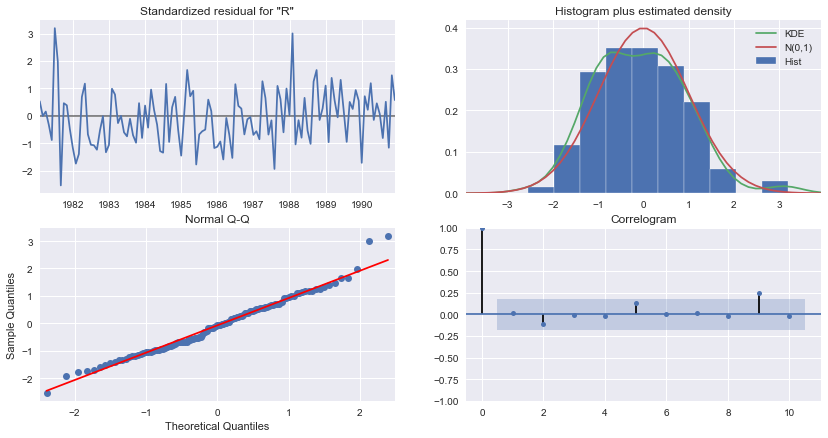

In [165]:
results_auto_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [166]:
pred_dynamic = results_auto_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [167]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose_log = results_auto_SARIMA_rose_log.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [168]:
predicted_auto_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.727941  0.073894       1.583111       1.872771
1991-02-28  1.787595  0.074681       1.641223       1.933966
1991-03-31  1.820440  0.074703       1.674025       1.966855
1991-04-30  1.780351  0.074704       1.633934       1.926768
1991-05-31  1.811709  0.074704       1.665292       1.958126

In [169]:
# Extract the predicted and true values of our time series
rose_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['rose_log_auto_forecasted'] = np.power(10, predicted_auto_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Rose  rose_auto_forecasted  rose_log_auto_forecasted
Time_Stamp                                                      
1991-01-31  54.0             54.885047                 53.449197
1991-02-28  55.0             63.983030                 61.318964
1991-03-31  66.0             71.826234                 66.136298
1991-04-30  65.0             69.042010                 60.304675
1991-05-31  60.0             77.050275                 64.820009

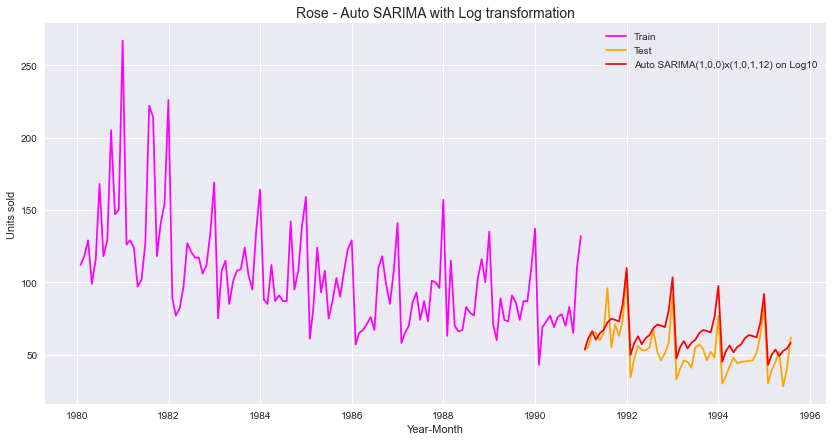

In [170]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_auto_forecasted'], color='red', label='Auto SARIMA(1,0,0)x(1,0,1,12) on Log10')

plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [171]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_auto_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 13.591 and MAPE is 21.92


In [172]:
resultsDf_8_rose2 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(1,0,0)x(1,0,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493835      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  20.156483      33.63
Auto SARIMA(2,1,3)x(2,1,3,6)           16.726881      27.60
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590947      21.92

#### Manual SARIMA on Rose

#### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

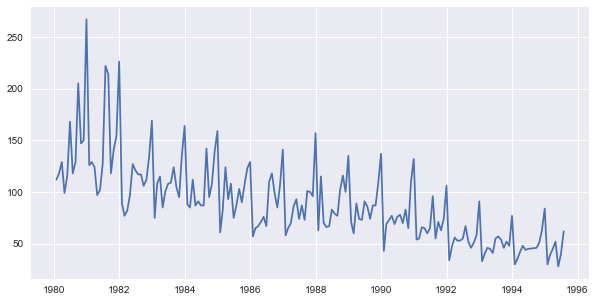

In [173]:
plt.figure(figsize=(10,5))
plt.plot(df_rose['Rose'])

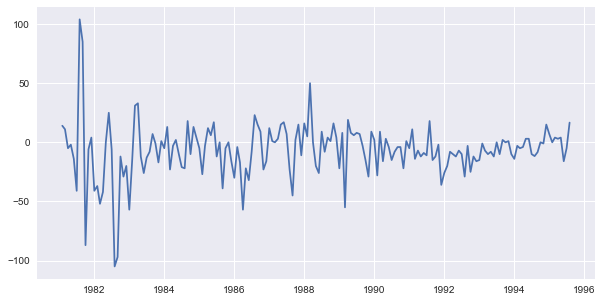

In [174]:
plt.figure(figsize=(10,5))
plt.plot(df_rose['Rose'].diff(12).dropna())

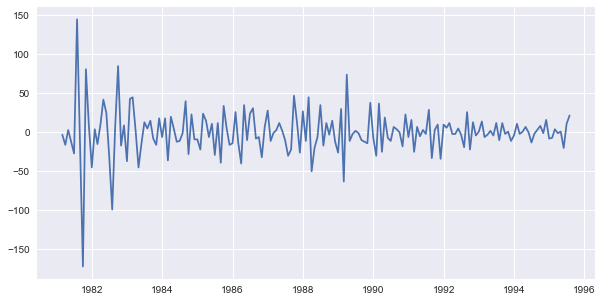

In [175]:
plt.figure(figsize=(10,5))
plt.plot((df_rose['Rose'].diff(12).dropna()).diff().dropna())

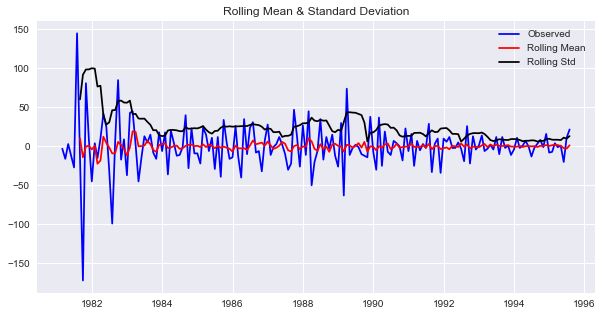

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [176]:
plt.figure(figsize=(10,5))
test_stationarity((df_rose['Rose'].diff(12).dropna()).diff().dropna(),'blue')

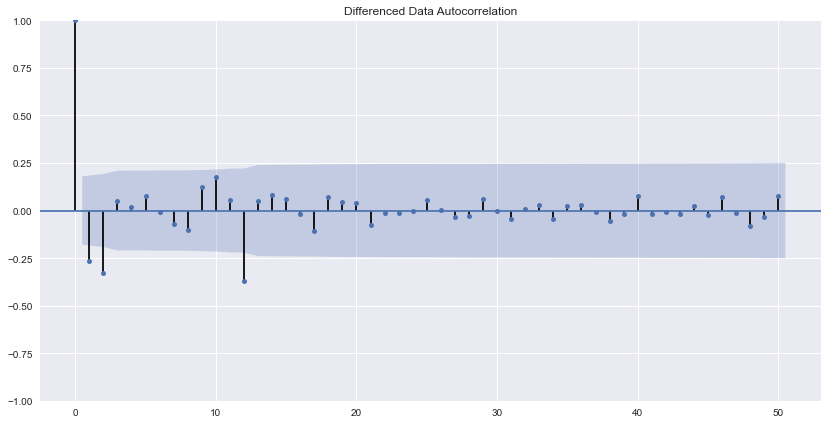

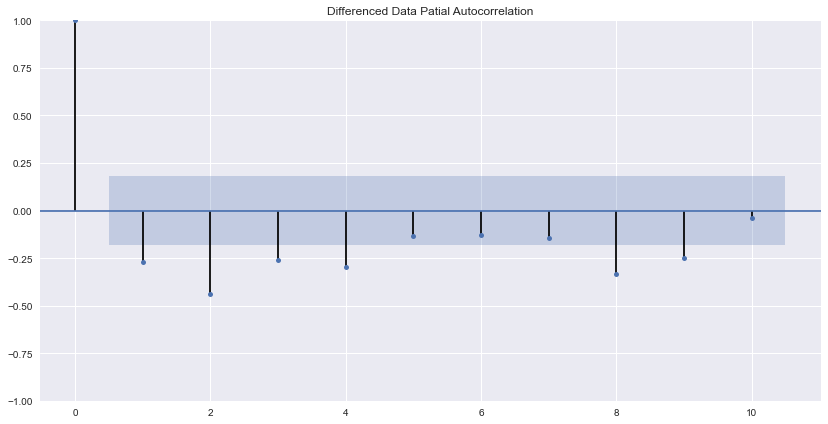

In [177]:
plot_acf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

In [178]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                #seasonal_order=(0, 1, 1, 12),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Wed, 02 Feb 2022   AIC                            786.737
Time:                                    21:57:09   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

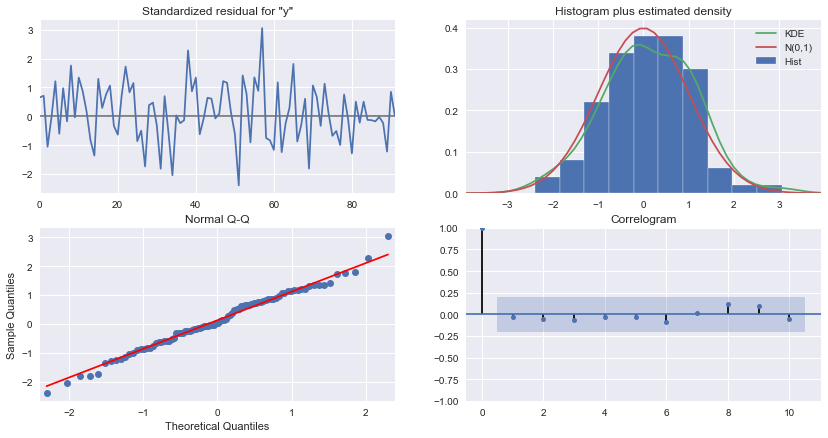

In [179]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

In [180]:
pred_dynamic = results_manual_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [181]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test['Rose']), alpha=0.05)

In [182]:
predicted_manual_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.733041  15.552666      14.250375      75.215707
1  64.208694  16.000767      32.847766      95.569622
2  65.110690  16.074606      33.605040      96.616339
3  68.453063  16.150996      36.797692     100.108433
4  61.423433  16.154556      29.761085      93.085781

In [183]:
rose_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_manual_forecasted'] = predicted_manual_SARIMA_rose.predicted_mean
SARIMA_test.head()

Rose  rose_auto_forecasted  rose_log_auto_forecasted  \
Time_Stamp                                                         
1991-01-31  54.0             54.885047                 53.449197   
1991-02-28  55.0             63.983030                 61.318964   
1991-03-31  66.0             71.826234                 66.136298   
1991-04-30  65.0             69.042010                 60.304675   
1991-05-31  60.0             77.050275                 64.820009   

            rose_manual_forecasted  
Time_Stamp                          
1991-01-31               44.733041  
1991-02-28               64.208694  
1991-03-31               65.110690  
1991-04-30               68.453063  
1991-05-31               61.423433

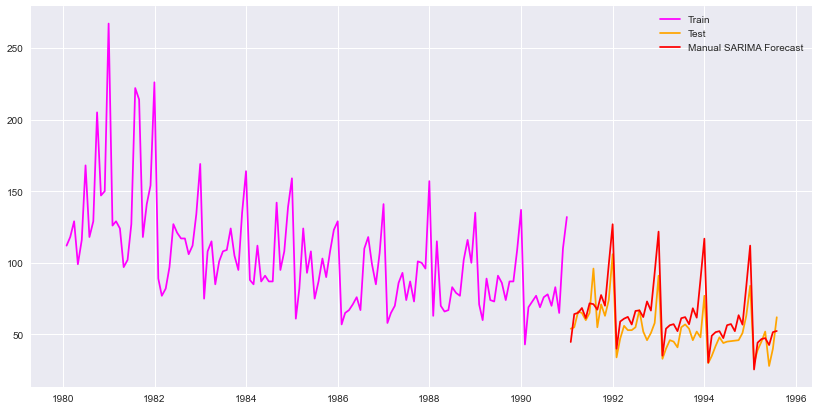

In [184]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_manual_forecasted'], color='red', label='Manual SARIMA Forecast')

plt.legend(loc='best')

In [187]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_manual_forecasted'])
print("For manual SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For manual SARIMA forecast on the Rose Testing Data:  RMSE is 15.377 and MAPE is 22.16


In [188]:
resultsDf_8_rose3 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,2)x(0,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose3])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493835      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  20.156483      33.63
Auto SARIMA(2,1,3)x(2,1,3,6)           16.726881      27.60
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590947      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16

#### Manual SARIMA on Log

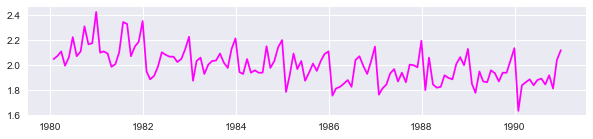

In [189]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train, color='magenta')

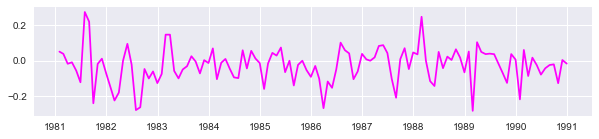

In [190]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train.diff(12).dropna(), color='magenta')#.diff().dropna())

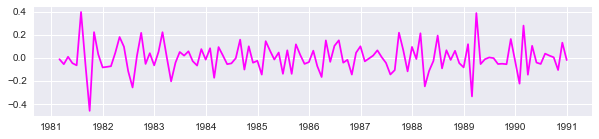

In [191]:
plt.figure(figsize=(10,2))
plt.plot((rose_log_train.diff(12).dropna()).diff().dropna(), color='magenta')#.diff().dropna())

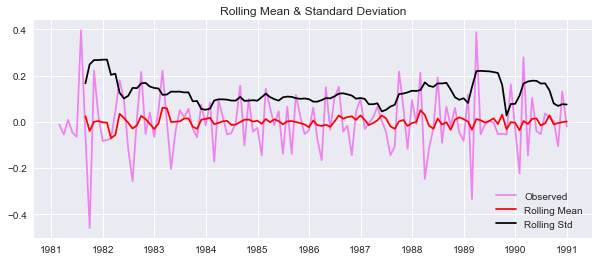

Results of Dickey-Fuller Test:
Test Statistic                  -3.910109
p-value                          0.001962
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [192]:
plt.figure(figsize=(10,4))
test_stationarity((rose_log_train.diff(12).dropna()).diff().dropna(), 'violet')

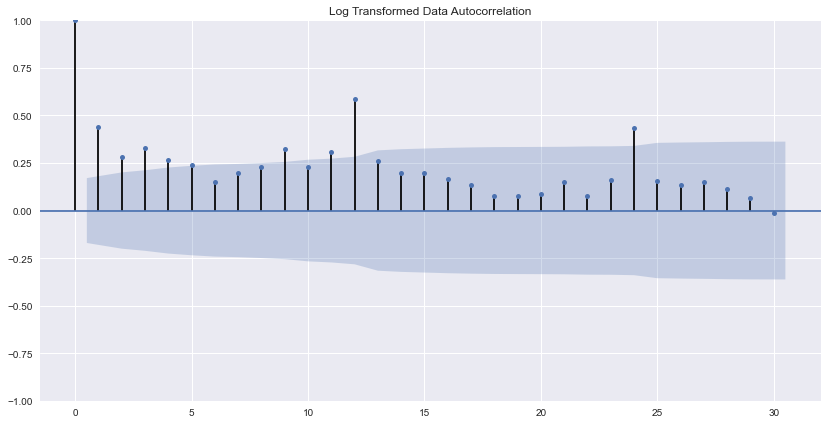

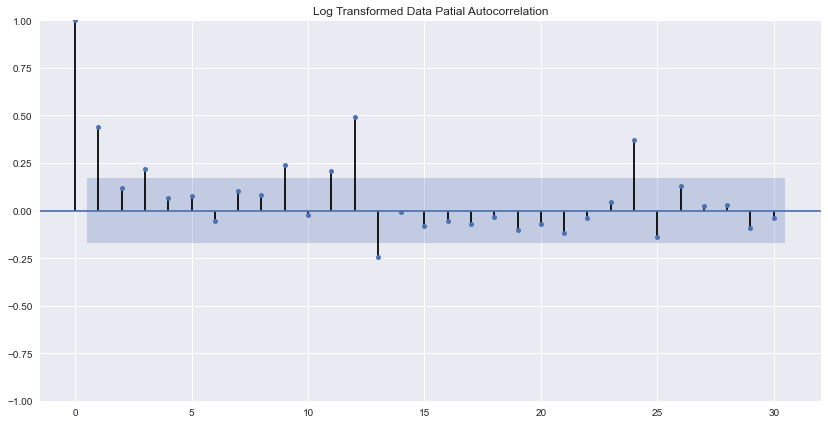

In [193]:
plot_acf(rose_log_train,lags=30,title='Log Transformed Data Autocorrelation')
plot_pacf(rose_log_train,lags=30,title='Log Transformed Data Patial Autocorrelation')
plt.show()

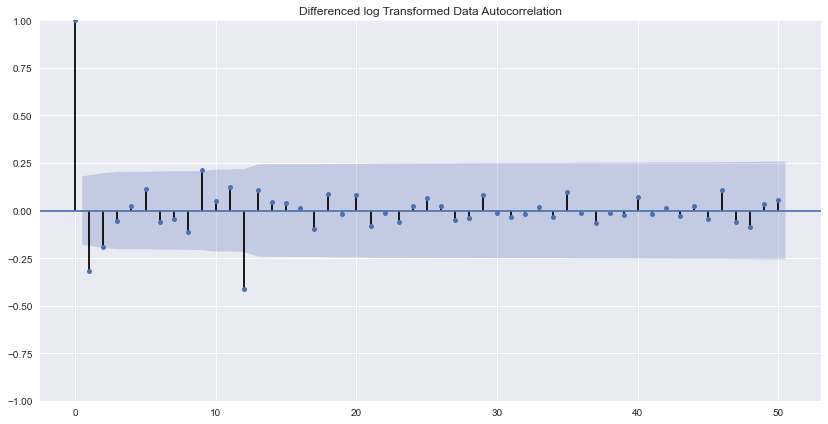

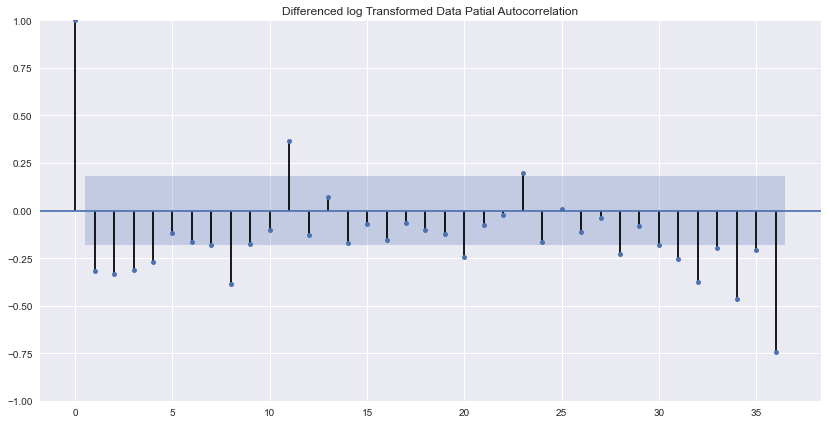

In [194]:
plot_acf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=50,title='Differenced log Transformed Data Autocorrelation')
plot_pacf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=36,title='Differenced log Transformed Data Patial Autocorrelation')
plt.show()

In [195]:
manual_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order= (4, 1, 1),
                                seasonal_order= (0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose_log = manual_SARIMA_rose_log.fit(maxiter=1000)
print(results_manual_SARIMA_rose_log.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 128.764
Date:                            Wed, 02 Feb 2022   AIC                           -243.528
Time:                                    22:17:58   BIC                           -224.950
Sample:                                01-31-1980   HQIC                          -236.000
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0017      0.118     -0.014      0.989      -0.232       0.229
ar.L2         -0.1553      0.126   

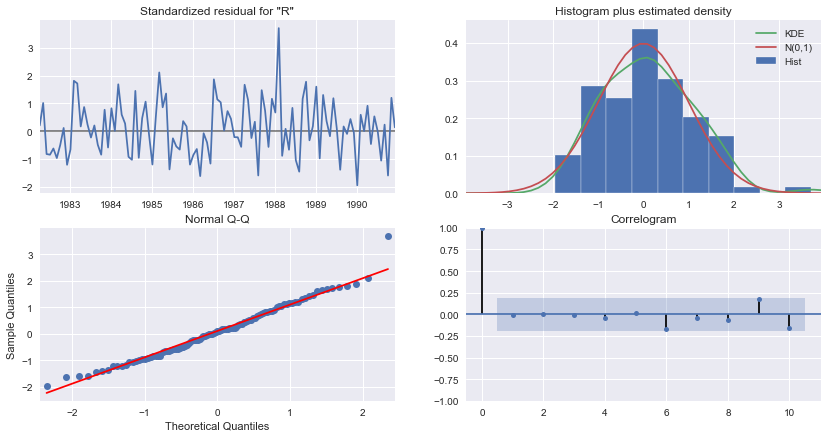

In [196]:
results_manual_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [197]:
pred_dynamic = results_manual_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [198]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose_log = results_manual_SARIMA_rose_log.get_forecast(steps=len(test['Rose']), alpha=0.1)

In [199]:
predicted_manual_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.721103  0.067177       1.589438       1.852769
1991-02-28  1.788993  0.067978       1.655758       1.922229
1991-03-31  1.811248  0.067976       1.678017       1.944478
1991-04-30  1.786846  0.067999       1.653571       1.920122
1991-05-31  1.820847  0.067843       1.687877       1.953818

In [200]:
SARIMA_test['rose_log_manual_forecasted'] = np.power(10,predicted_manual_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Rose  rose_auto_forecasted  rose_log_auto_forecasted  \
Time_Stamp                                                         
1991-01-31  54.0             54.885047                 53.449197   
1991-02-28  55.0             63.983030                 61.318964   
1991-03-31  66.0             71.826234                 66.136298   
1991-04-30  65.0             69.042010                 60.304675   
1991-05-31  60.0             77.050275                 64.820009   

            rose_manual_forecasted  rose_log_manual_forecasted  
Time_Stamp                                                      
1991-01-31               44.733041                   52.614211  
1991-02-28               64.208694                   61.516758  
1991-03-31               65.110690                   64.751153  
1991-04-30               68.453063                   61.213372  
1991-05-31               61.423433                   66.198387

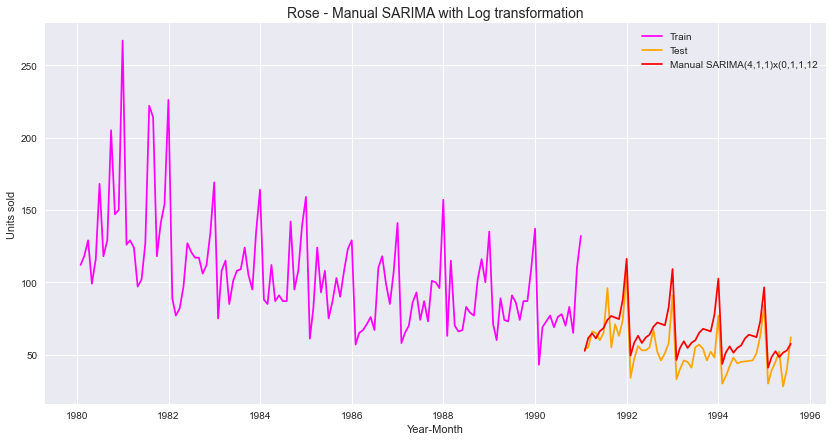

In [201]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_manual_forecasted'], color='red', label='Manual SARIMA(4,1,1)x(0,1,1,12')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Manual SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [202]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 14.177 and MAPE is 23.10


In [203]:
resultsDf_8_rose4 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,1)x(0,1,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose4])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493835      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  20.156483      33.63
Auto SARIMA(2,1,3)x(2,1,3,6)           16.726881      27.60
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590947      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.177004      23.10

#### Building the most optimum model on the Full Data.

In [204]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493835      13.68
2 point TMA                            11.529278      13.54
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590947      21.92
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.177004      23.10
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
RegressionOnTime                       15.268885      22.82
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
DES Alpha 0.16, Beta 0.16              15.706968      24.12
Auto SARIMA(2,1,3)x(2,1,3,6)           16.726881      27.60
TES Alpha 0.11, Beta 0.05, Gamma 0.00  20.156483      33.63
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
NaiveModel                             79.718559     145.10

In [205]:
rose_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
2 point TMA                            11.529278      13.54
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493835      13.68
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590947      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
RegressionOnTime                       15.268885      22.82
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.177004      23.10
DES Alpha 0.16, Beta 0.16              15.706968      24.12
Auto SARIMA(2,1,3)x(2,1,3,6)           16.726881      27.60
TES Alpha 0.11, Beta 0.05, Gamma 0.00  20.156483      33.63
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
NaiveModel                             79.718559     145.10

Text(0.5, 1.0, 'ROSE : Forecast Vs Test Data')

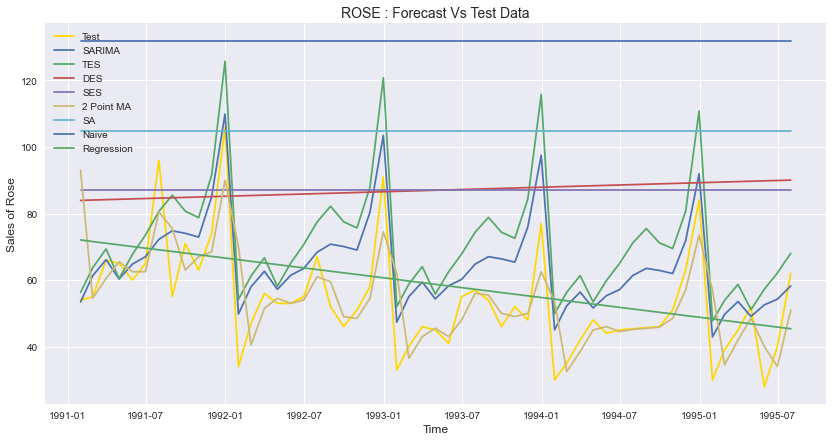

In [206]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'gold')

#SARIMA
plt.plot(SARIMA_test['rose_log_auto_forecasted'],  label='SARIMA')
#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES')
#DES
plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES')
#SES
plt.plot(SES_test['predict_rose'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_Rose'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : Forecast Vs Test Data', fontsize=14)

#### Build TES Model on Rose full data

In [208]:
model_TES_rose = ExponentialSmoothing(df_rose['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_rose_forecast = model_TES_rose_fit.forecast(steps=12)

In [209]:
rmse_rose_tes_full = metrics.mean_squared_error(df_rose['Rose'],model_TES_rose_fit.fittedvalues,squared=False)
mape_rose_tes_full = MAPE(df_rose['Rose'],model_TES_rose_fit.fittedvalues)
print("TES forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_tes_full, mape_rose_tes_full))

TES forecast on the Rose Full Data:  RMSE is 17.404 and MAPE is 13.87


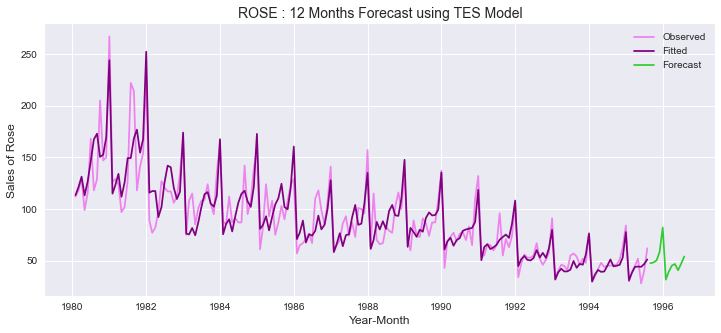

In [210]:
plt.figure(figsize=(12,5))

plt.plot(df_rose['Rose'], label='Observed', color = 'violet')
plt.plot(model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

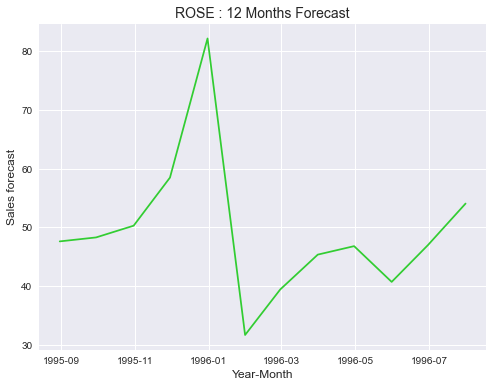

In [211]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14)

#### Try SARIMAX

In [212]:
rose_log_trans = np.log10(df_rose['Rose'])

In [213]:
rose_full_data_model = sm.tsa.statespace.SARIMAX(df_rose['Rose'],#rose_log_trans.values,
                                order= (4,1,1), #(1,0,0), #(4,1,1)x(0,1,1,12)
                                seasonal_order= (0,1,1,12), #(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = rose_full_data_model.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -664.135
Date:                            Wed, 02 Feb 2022   AIC                           1342.270
Time:                                    22:24:05   BIC                           1363.796
Sample:                                01-31-1980   HQIC                          1351.011
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0914      0.084      1.093      0.274      -0.072       0.255
ar.L2         -0.1077      0.077   

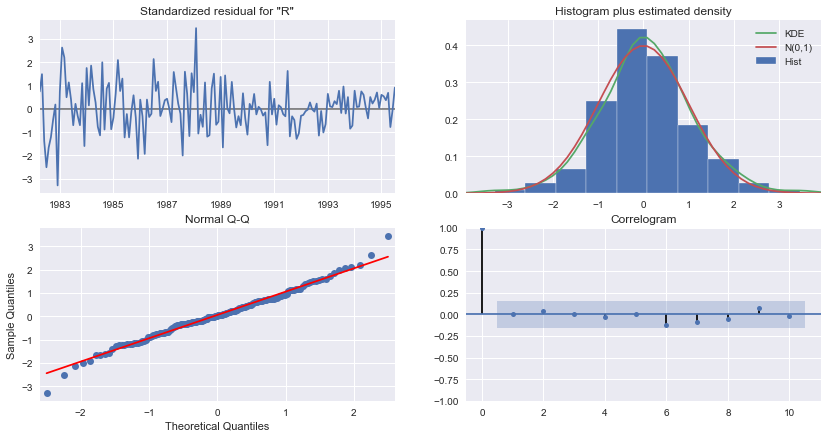

In [214]:
results_full_data_model_rose.plot_diagnostics();

In [215]:
predicted_rose_SARIMA_full_data = results_full_data_model_rose.get_forecast(steps=12)
predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  46.540808  15.245485      16.660206      76.421411
1995-09-30  45.514602  15.769107      14.607720      76.421484
1995-10-31  46.226234  15.827871      15.204177      77.248291
1995-11-30  54.319829  15.831175      23.291296      85.348362
1995-12-31  82.214864  15.835193      51.178456     113.251272

In [216]:
rmse_rose_sarima_full = metrics.mean_squared_error(df_rose['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
mape_rose_sarima_full = MAPE(df_rose['Rose'],results_full_data_model_rose.fittedvalues)

print("For SARIMA forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_sarima_full, mape_rose_sarima_full))

For SARIMA forecast on the Rose Full Data:  RMSE is 30.676 and MAPE is 19.40


In [217]:
pred_full_manual_SARIMA_date = predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

In [218]:
results_full_data_model_rose.fittedvalues.head()

Time_Stamp
1980-01-31      0.000000
1980-02-29    115.410430
1980-03-31    114.398802
1980-04-30    123.947736
1980-05-31     92.219740
dtype: float64

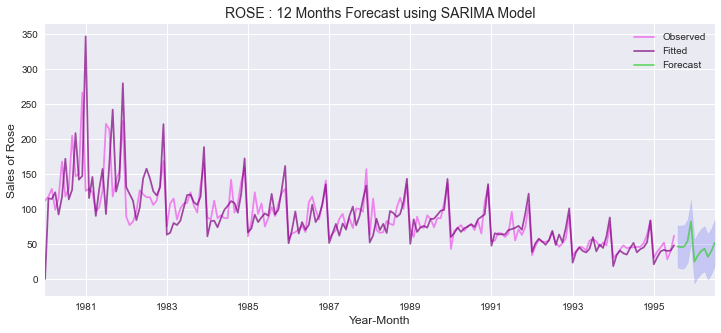

In [219]:
plt.figure(figsize=(12,5))

axis = df_rose['Rose'].plot(label='Observed', color = 'violet')

#np.power(10,results_full_data_model_rose.fittedvalues).plot(label='Fitted', alpha=0.7, color = 'crimson')
#np.power(10,pred_full_manual_SARIMA_date['mean']).plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')

results_full_data_model_rose.fittedvalues.plot(label='Fitted', alpha=0.7, color = 'purple')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'limegreen')

axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

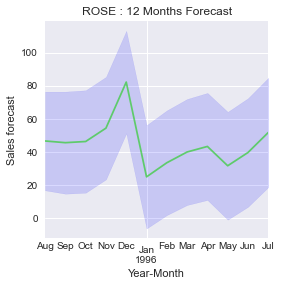

In [220]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast', fontsize=12)

In [221]:
forecast2 = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast2

ROSE
1995-08-31  46.54
1995-09-30  45.51
1995-10-31  46.23
1995-11-30  54.32
1995-12-31  82.21
1996-01-31  24.81
1996-02-29  33.35
1996-03-31  39.87
1996-04-30  43.23
1996-05-31  31.53
1996-06-30  39.56
1996-07-31  51.70

In [222]:
forecast2.describe()

ROSE
count  12.000000
mean   44.905000
std    14.473222
min    24.810000
25%    38.007500
50%    44.370000
75%    47.830000
max    82.210000